In [19]:
import pandas as pd
import numpy as np
from mlgear.utils import show
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [20]:
battlegrounds = ['Georgia', 'Texas', 'Ohio', 'Michigan', 'Pennsylvania', 'Maine', 'Iowa', 'South Carolina',
                 'North Carolina', 'Florida', 'Colorado', 'Nebraska', 'Arizona', 'Alaska', 'New Mexico',
                 'Nevada', 'National', 'Wisconsin']

def plot_polls(polls, grouper, election='president', year=2020, day_filter=30, count_filter=10,
               battlegrounds=battlegrounds):
    if not isinstance(grouper, list):
        grouper = [grouper]

    disp = polls
    
    if year is not None:
        if isinstance(year, list):
            disp = disp[(disp['year'].isin(year))]
        else:
            disp = disp[(disp['year'] == year)]
        
    if day_filter is not None:
        disp = disp[(disp['days_until'] < day_filter)]
        
    if election is not None:
        if isinstance(election, list):
            disp = disp[disp['election'].isin(election)]
        else:
            disp = disp[disp['election'] == election]
            
    if battlegrounds is not None:
        disp = disp[disp['state'].isin(battlegrounds)]

    if election is not None:
        disp = disp.groupby(['election'] + grouper)
    else:
        disp = disp.groupby(grouper)

    disp = disp[['polled_margin', 'actual_margin', 'margin_diff', 'margin_abs_diff']]
    disp = disp.agg(['mean', 'std', 'count']).reset_index()
    
    cols = grouper + ['polled_margin_mean', 'polled_margin_std', 'polled_margin_count',
                      'actual_margin_mean', 'actual_margin_count', 'actual_margin_std', 'margin_diff_mean',
                      'margin_diff_std', 'margin_diff_count', 'margin_abs_diff_mean', 'margin_abs_diff_std',
                      'margin_abs_diff_count']
    if election is not None:
        cols = ['election'] + cols
    disp.columns = cols
    
    disp = disp[disp['margin_abs_diff_count'] > count_filter]
        
    if disp.shape[0] > 0:
        show(disp.sort_values('margin_abs_diff_mean', ascending=False)[grouper + ['polled_margin_mean',
                                                                        'actual_margin_mean', 'margin_diff_mean',
                                                                        'polled_margin_count', 'polled_margin_std']].reset_index(drop=True),
             max_rows=None)

        if len(grouper) == 2:
            disp = disp.sort_values([grouper[0], 'margin_abs_diff_mean'])
        else:
            disp = disp.sort_values('margin_abs_diff_mean')
        meanx = disp['margin_abs_diff_mean'].values
        stdx = disp['margin_abs_diff_std'].values
        nx = disp['margin_abs_diff_count'].values
        labels = [l + ' (N={})'.format(nx[i]) for i, l in enumerate([' '.join(x) for x in disp[grouper].values])]
        cis_80 = 1.282 * (stdx / np.sqrt(nx))
        x_pos = [i for i, _ in enumerate(labels)]

        plt.figure(figsize=(20, int(len(labels))))
        for zone in ['ytick', 'xtick']:
            plt.rc(zone, labelsize=14)
            
        plt.barh(x_pos, meanx, color='green', xerr=cis_80)
        plt.yticks(x_pos, labels)
        
        title = 'Average Absolute Difference Between Polled and Actual Margin for '
        if isinstance(election, list):
            election = ', '.join(election)
        if isinstance(year, list):
            year = ', '.join([str(y) for y in year])
            
        if election is not None and year is not None:
            title += '{} {} (lower = better)'.format(election.title(), year)
        elif election is not None:
            title += '{} for all years (1999-2020) (lower = better)'.format(election.title())
        elif year is not None:
            title += 'all POTUS+Senate+Governor+GCB for {} (lower = better)'.format(year)
        else:
            title += 'all POTUS+Senate+Governor+GCB for all years (1999-2020) (lower = better)'
            
        plt.xlabel(title, fontsize=14)
        plt.show()

## Load Polls

In [21]:
polls = pd.read_csv('polls.csv')
polls

election      state  year    stage dem_candidate  \
0      president    Alabama  2004  general        NoName   
1      president    Alabama  2004  general        NoName   
2      president    Alabama  2004  general        NoName   
3      president    Alabama  2004  general        NoName   
4      president    Alabama  2004  general        NoName   
...          ...        ...   ...      ...           ...   
27114   governor  Louisiana  2019  general       Edwards   
27115   governor  Louisiana  2019  general       Edwards   
27116   governor  Louisiana  2019  general       Edwards   
27117   governor  Louisiana  2019  general       Edwards   
27118   governor  Louisiana  2019  general       Edwards   

                                pollster     N           methodology  \
0                             SurveyUSA    735               Unknown   
1                        Capital Survey    645               Unknown   
2                             SurveyUSA    699               Unknown   
3                       Mobile Register    619               Unknown   
4                                   ARG    699               Unknown   
...                                  ...   ...                   ...   
27114                             Cygnal   800  IVR/Online/Live/Text   
27115             Targoz Market Research   640                Online   
27116  Edgewater Research/My People Vote   661                   IVR   
27117                      JMC Analytics   600         IVR/Live/Text   
27118                    Trafalgar Group  1107                   IVR   

      population  days_until  ... dem_actual  rep_actual  ind_actual  \
0        Unknown           6  ...  37.099698   62.900302        -1.0   
1        Unknown          19  ...  37.099698   62.900302        -1.0   
2        Unknown          30  ...  37.099698   62.900302        -1.0   
3        Unknown          33  ...  37.099698   62.900302        -1.0   
4        Unknown          47  ...  37.099698   62.900302        -1.0   
...          ...         ...  ...        ...         ...         ...   
27114    Unknown           8  ...  51.330000   48.670000         0.0   
27115    Unknown           6  ...  51.330000   48.670000         0.0   
27116    Unknown           5  ...  51.330000   48.670000         0.0   
27117    Unknown           3  ...  51.330000   48.670000         0.0   
27118    Unknown           2  ...  51.330000   48.670000         0.0   

       dem_diff  rep_diff  polled_margin  actual_margin  margin_diff  \
0      3.900302 -3.900302          -18.0     -25.800604     7.800604   
1      0.900302 -0.900302          -24.0     -25.800604     1.800604   
2     -1.099698  1.099698          -28.0     -25.800604    -2.199396   
3     -5.599698  5.599698          -37.0     -25.800604   -11.199396   
4      5.900302 -5.900302          -14.0     -25.800604    11.800604   
...         ...       ...            ...            ...          ...   
27114 -0.230000  0.230000            2.2       2.660000    -0.460000   
27115  0.670000 -0.670000            4.0       2.660000     1.340000   
27116 -1.180000  1.180000            0.3       2.660000    -2.360000   
27117 -1.080000  1.080000            0.5       2.660000    -2.160000   
27118 -1.930000  1.930000           -1.2       2.660000    -3.860000   

       margin_abs_diff  538grade_simple  
0             7.800604          Unknown  
1             1.800604          Unknown  
2             2.199396          Unknown  
3            11.199396          Unknown  
4            11.800604          Unknown  
...                ...              ...  
27114         0.460000                B  
27115         1.340000                C  
27116         2.360000                C  
27117         2.160000                C  
27118         3.860000              D/F  

[27119 rows x 25 columns]

## State Difficulty

## President 2020 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             Iowa            0.323333           -8.152965          8.476298   
1        Wisconsin            7.935849            0.627100          7.308750   
2             Ohio           -1.978929           -8.031962          6.053033   
3          Florida            2.310933           -3.358369          5.669302   
4         Michigan            7.629846            2.783528          4.846319   
5            Texas           -1.007000           -5.578594          4.571594   
6     Pennsylvania            5.087901            1.164884          3.923018   
7            Maine           13.283333            8.974351          4.308982   
8   North Carolina            2.557606           -1.348121          3.905726   
9   South Carolina           -7.854706          -11.676642          3.821937   
10         Arizona            3.254386            0.308710          2.945676   
11         Georgia 

-
## Senate 2020 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Maine            3.500000           -8.501941         12.001941   
1            Iowa            1.529524           -6.478210          8.007734   
2        Michigan            7.136250            1.685031          5.451219   
3  North Carolina            3.619362           -1.746737          5.366098   
4         Arizona            6.638889            2.348697          4.290192   
5           Texas           -5.505263           -9.639404          4.134141   
6         Georgia            1.333103           -1.778976          3.112079   

   polled_margin_count  polled_margin_std  
0                   20           4.167291  
1                   21           3.380666  
2                   40           3.879763  
3                   47           3.020542  
4                   36           3.357999  
5                   19           3.016340  
6                   29           3.2085

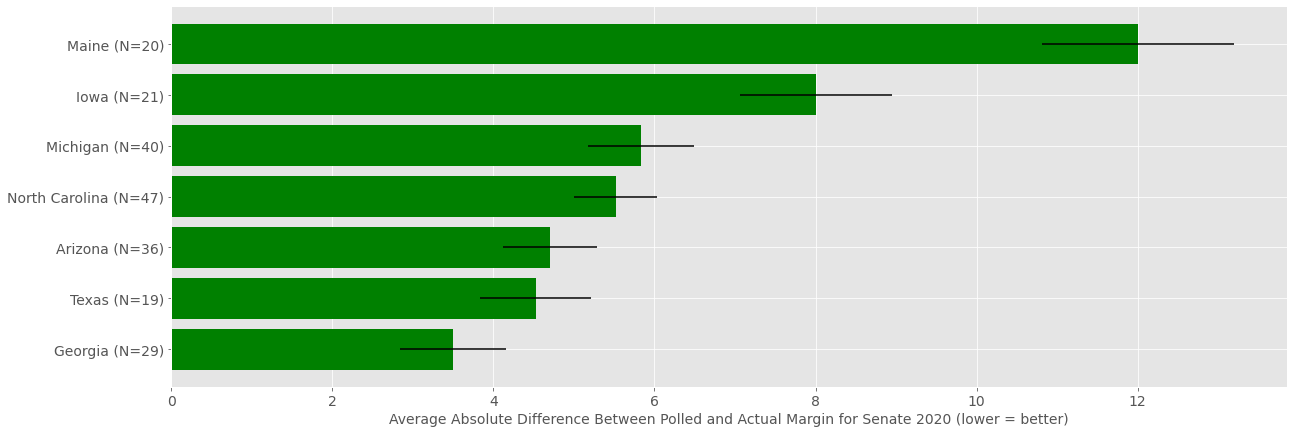

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Ohio           11.450000            6.842886          4.607114   
1    Nevada            0.469310            5.027926         -4.558615   
2  Michigan            9.221429            6.502801          2.718627   
3   Arizona            0.338889            2.346432         -2.007544   
4     Texas           -5.302083           -2.564831         -2.737252   
5   Florida            1.421519           -0.121426          1.542945   

   polled_margin_count  polled_margin_std  
0                   12           4.521363  
1                   29           3.175974  
2                   28           4.584705  
3                   54           4.115992  
4                   24           2.759408  
5                   79           3.541155  
(6, 6)


-
## Governor 2018 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0   Florida            3.108750           -0.400000          3.508750   
1   Arizona          -15.321429          -14.160000         -1.161429   
2  Michigan            8.600000            9.560000         -0.960000   

   polled_margin_count  polled_margin_std  
0                   32           3.763303  
1                   14           4.585962  
2                   12           3.692499  
(3, 6)


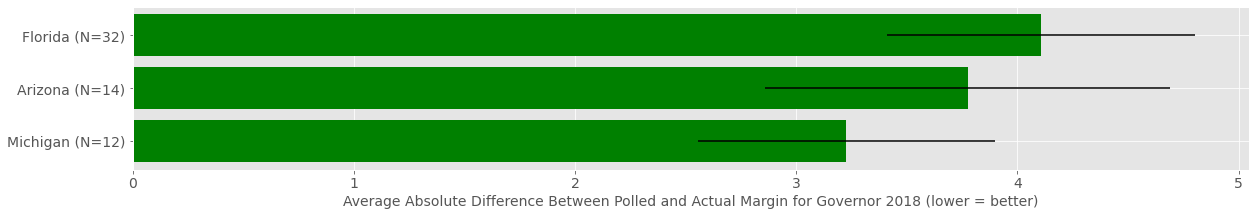

-
## President 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0            Ohio           -2.005000           -8.070000          6.065000   
1       Wisconsin            5.211538           -0.770000          5.981538   
2  North Carolina            1.743462           -3.660000          5.403462   
3        Michigan            4.650000           -0.220000          4.870000   
4    Pennsylvania            3.795862           -0.710000          4.505862   
5         Florida            1.372222           -1.190000          2.562222   
6          Nevada            0.552381            2.420000         -1.867619   
7         Georgia           -3.173125           -5.090000          1.916875   
8         Arizona           -2.000000           -3.500000          1.500000   
9        Colorado            3.031429            4.910000         -1.878571   

   polled_margin_count  polled_margin_std  
0                   18           3.075536  
1                  

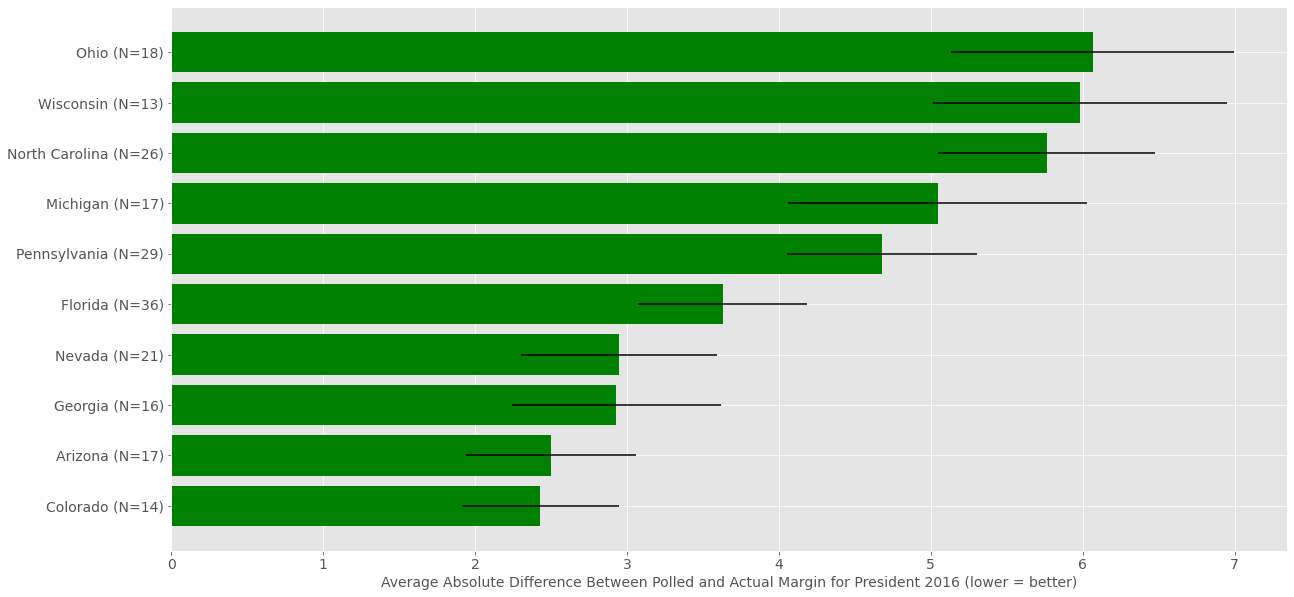

-
## Senate 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina           -1.027273           -5.690000          4.662727   
1         Georgia          -10.683333          -13.750000          3.066667   
2    Pennsylvania            2.556522           -1.430000          3.986522   
3         Florida           -5.253333           -7.670000          2.416667   
4         Arizona           -9.250000          -12.960000          3.710000   
5          Nevada            1.381250            2.430000         -1.048750   

   polled_margin_count  polled_margin_std  
0                   22           3.076359  
1                   12           4.127476  
2                   23           3.260762  
3                   30           4.626217  
4                   12           3.887626  
5                   16           3.611873  
(6, 6)


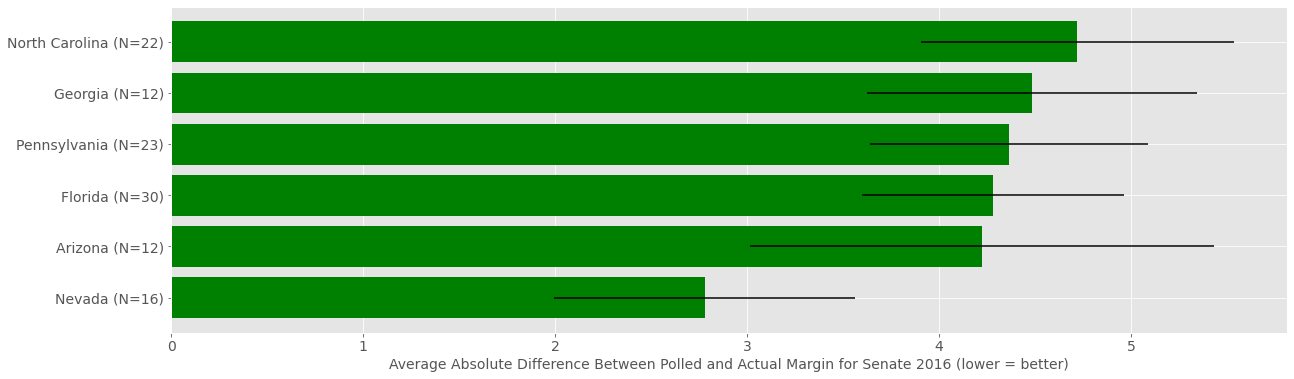

-
## Governor 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina            3.428571            0.220000          3.208571   

   polled_margin_count  polled_margin_std  
0                   14           3.298351  
(1, 6)


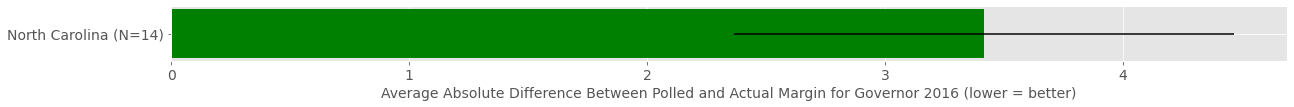

-
## President 2014 ##
-
## Senate 2014 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Georgia           -1.035517           -7.841379          6.805862   
1            Iowa           -1.603448           -8.356552          6.753103   
2  North Carolina            0.551724           -1.681379          2.233103   
3        Colorado           -1.741176           -2.804118          1.062941   

   polled_margin_count  polled_margin_std  
0                   29           2.639970  
1                   29           2.121570  
2                   29           2.443449  
3                   34           3.110697  
(4, 6)


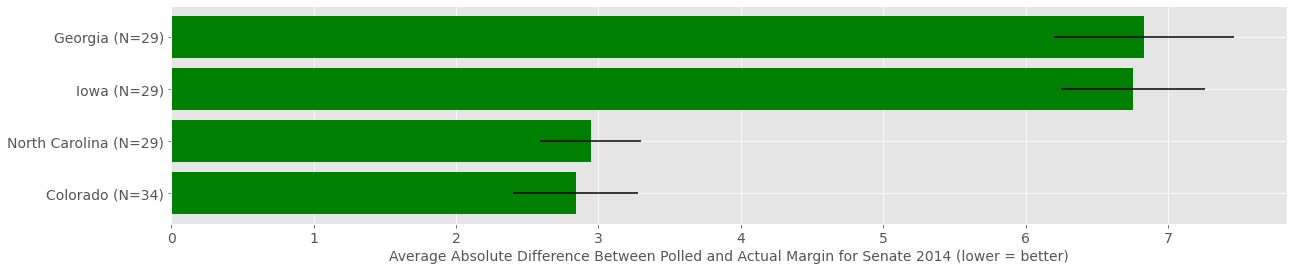

-
## Governor 2014 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Iowa          -18.000000          -21.720000          3.720000   
1   Georgia           -3.421053           -7.860000          4.438947   
2  Colorado            0.764706            3.350000         -2.585294   
3  Michigan           -1.833333           -4.060000          2.226667   
4   Florida            0.064706           -1.070000          1.134706   

   polled_margin_count  polled_margin_std  
0                   13           4.453463  
1                   19           2.364454  
2                   17           3.288796  
3                   12           3.040136  
4                   17           2.752713  
(5, 6)


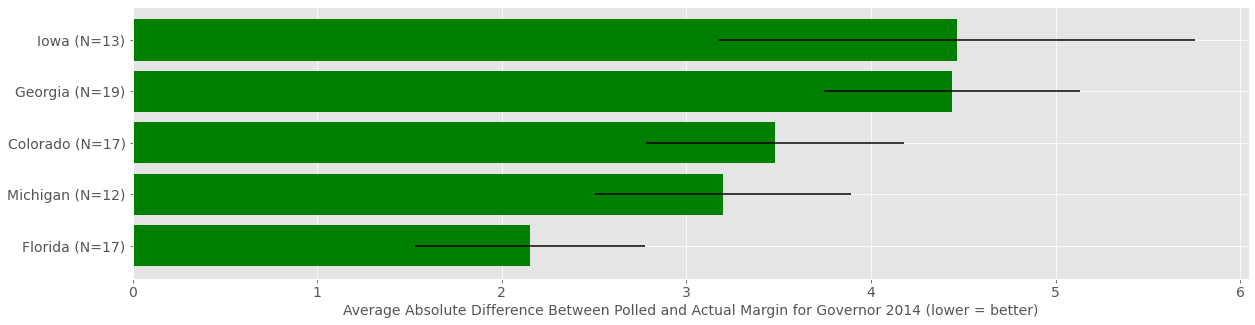

-
## President 2012 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Nebraska          -16.018750          -22.075488          6.056738   
1         Michigan            5.110000            9.559920         -4.449920   
2         Colorado            1.264384            5.453160         -4.188777   
3             Iowa            1.983871            5.881885         -3.898014   
4        Wisconsin            3.437838            7.002679         -3.564841   
5       New Mexico            7.294118           10.434971         -3.140853   
6           Nevada            3.768627            6.772705         -3.004077   
7   North Carolina           -2.156522           -2.059527         -0.096995   
8          Florida           -0.882500            0.879972         -1.762472   
9     Pennsylvania            4.276364            5.439470         -1.163106   
10            Ohio            2.144872            3.013051         -0.868180   
11         Georgi

-
## Senate 2012 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Nebraska           -6.900000          -15.546066          8.646066   
1      Michigan           13.407333           21.322728         -7.915395   
2       Florida            7.699412           13.233583         -5.534172   
3     Wisconsin            0.888525            5.658769         -4.770245   
4  Pennsylvania            5.758491            9.219174         -3.460683   
5       Arizona           -4.000000           -3.131553         -0.868447   
6    New Mexico            7.076923            5.900562          1.176361   
7          Ohio            4.864356            6.198588         -1.334232   
8        Nevada           -3.625806           -1.241903         -2.383903   

   polled_margin_count  polled_margin_std  
0                   19           5.446202  
1                   30           3.902637  
2                   68           4.048130  
3                   61           

-
## Governor 2012 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       Wisconsin           -5.083333           -6.822011          1.738678   
1  North Carolina          -13.083333          -11.632780         -1.450553   

   polled_margin_count  polled_margin_std  
0                   24           3.877658  
1                   24           3.549852  
(2, 6)


-
## President 2010 ##
-
## Senate 2010 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0        Nevada           -3.175000            5.952522         -9.127522   
1      Colorado           -2.190476            1.741955         -3.932431   
2  Pennsylvania           -4.250000           -2.018093         -2.231907   
3     Wisconsin           -6.807692           -4.874361         -1.933331   
4          Ohio          -17.200000          -17.785974          0.585974   

   polled_margin_count  polled_margin_std  
0                   40           2.458762  
1                   42           1.990687  
2                   60           3.100711  
3                   26           3.162521  
4                   30           3.428079  
(5, 6)


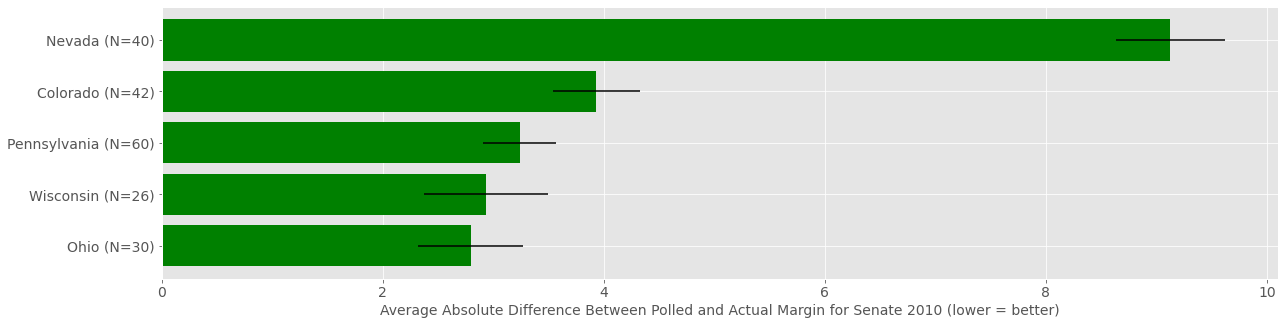

-
## Governor 2010 ##
           state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Alaska           -5.062500           -5.132692          0.070192   
1       Colorado            5.785714           15.767035         -9.981321   
2         Nevada          -17.275862          -12.196885         -5.078977   
3     New Mexico           -8.785714           -6.873889         -1.911826   
4        Florida           -0.016129           -1.192924          1.176795   
5      Wisconsin           -7.809524           -5.792016         -2.017508   
6   Pennsylvania           -8.351852           -8.985351          0.633500   
7        Georgia           -7.652174          -10.238728          2.586554   
8          Texas          -10.714286          -12.932814          2.218529   
9           Ohio           -3.754386           -2.270860         -1.483526   
10      Michigan          -17.600000          -18.477213          0.877213   

    polled_margin_count  polled_margin_st

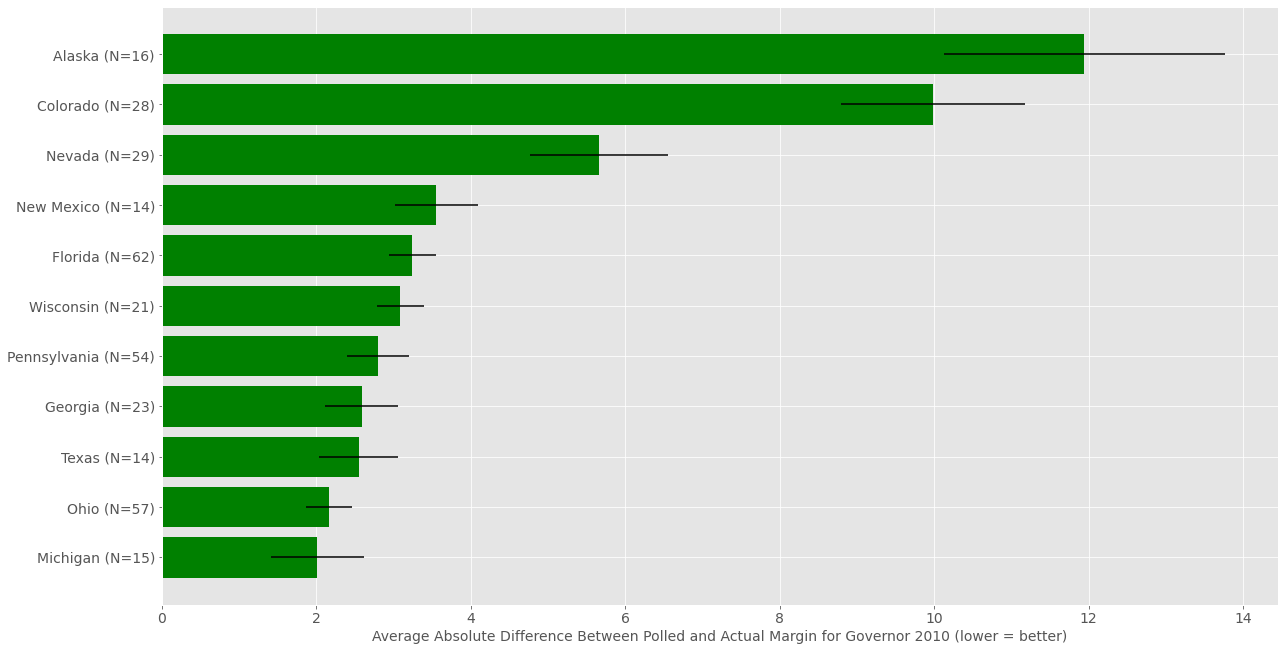

-
## President 2008 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Nevada            4.934328           12.708168         -7.773840   
1           Alaska          -15.213333          -21.969685          6.756351   
2       New Mexico            9.150000           15.279850         -6.129850   
3          Arizona           -3.954545           -8.583013          4.628468   
4            Maine           15.881481           17.561554         -1.680072   
5             Ohio            4.155000            4.647014         -0.492014   
6        Wisconsin           11.058621           14.069697         -3.011076   
7             Iowa           12.786111            9.658167          3.127944   
8         Colorado            6.673239            9.067181         -2.393941   
9         Michigan           14.578571           16.670555         -2.091983   
10  South Carolina          -11.333333           -9.062445         -2.270888   
11    Pennsylvani

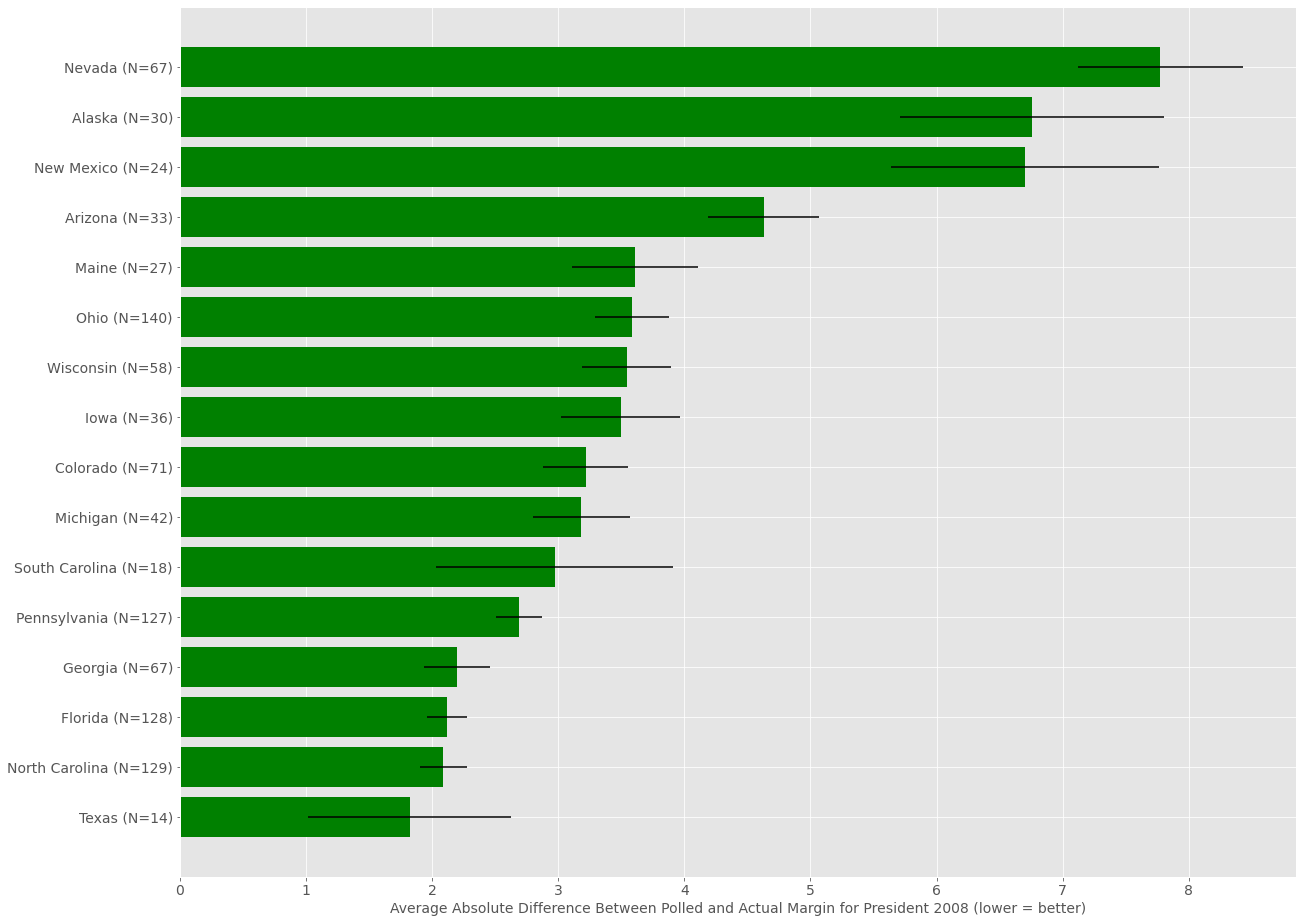

-
## Senate 2008 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Maine          -15.111111          -22.761980          7.650869   
1        Michigan           22.545455           29.574109         -7.028655   
2          Alaska            6.954545            1.300552          5.653993   
3      New Mexico           17.052632           22.657040         -5.604408   
4  North Carolina            3.629730            8.678767         -5.049037   
5            Iowa           21.700000           25.411715         -3.711715   
6         Georgia           -3.857143           -5.597323          1.740180   
7           Texas          -10.909091          -12.164722          1.255631   
8        Colorado           11.027778           10.659346          0.368432   

   polled_margin_count  polled_margin_std  
0                   27           3.533720  
1                   22           3.568744  
2                   22           7.816206  
3            

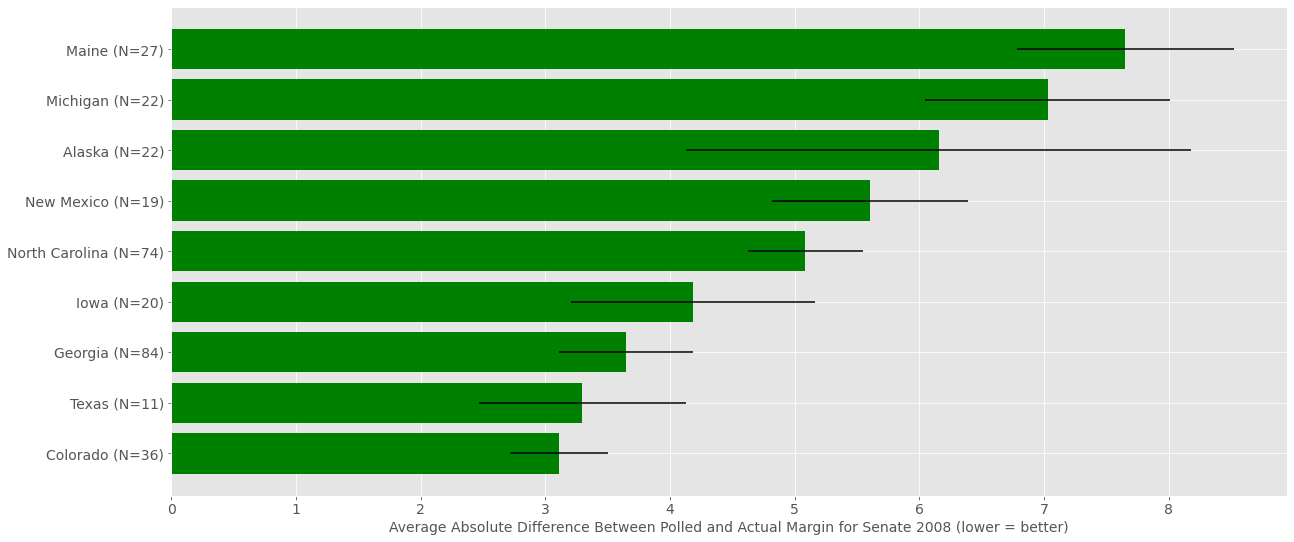

-
## Governor 2008 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina            1.128571            3.464532         -2.335960   

   polled_margin_count  polled_margin_std  
0                   42           2.592982  
(1, 6)


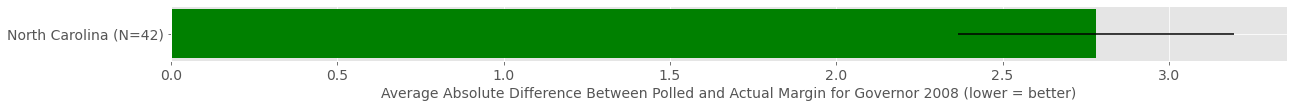

-
## President 2006 ##
-
## Senate 2006 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Texas          -29.754545          -26.029132         -3.725413   
1  Pennsylvania           11.274074           17.370038         -6.095964   
2      Michigan           11.832727           15.862170         -4.029443   
3          Ohio           10.710204           12.341814         -1.631610   
4       Arizona           -7.679167          -10.080818          2.401651   
5       Florida           24.350000           22.436890          1.913110   
6        Nevada          -13.647059          -14.722242          1.075184   

   polled_margin_count  polled_margin_std  
0                   11           6.800789  
1                   54           3.137610  
2                   55           4.423802  
3                   49           5.186531  
4                   24           3.759045  
5                   32           4.652783  
6                   17          

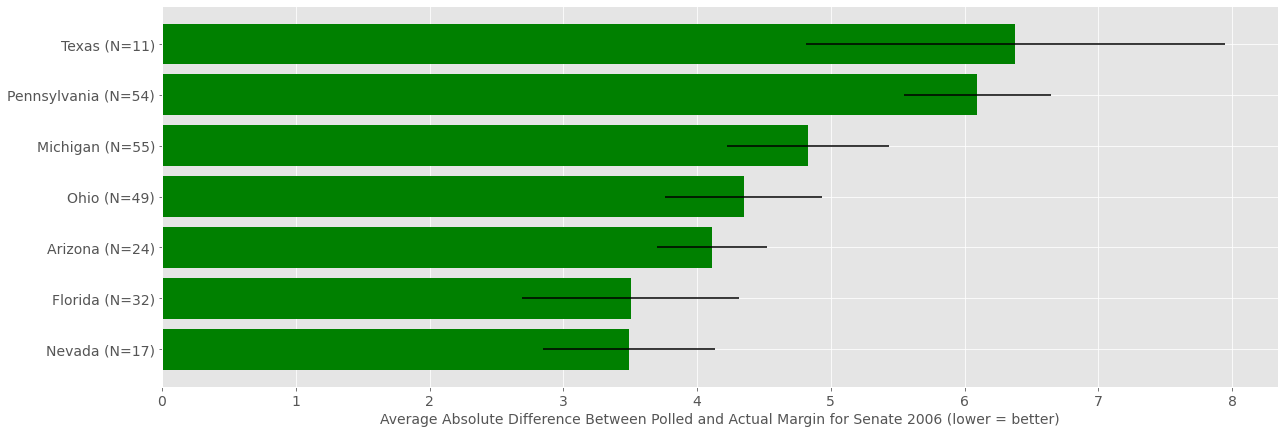

-
## Governor 2006 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0          Arizona           22.387500           27.562883         -5.175383   
1   South Carolina          -20.000000          -10.316874         -9.683126   
2             Iowa            2.270000            9.570755         -7.300755   
3             Ohio           21.583333           24.160719         -2.577386   
4         Colorado           15.504348           17.126055         -1.621707   
5         Michigan            8.862222           10.819800         -1.957578   
6          Georgia          -15.947368          -20.250170          4.302802   
7        Wisconsin            5.086957            7.567572         -2.480616   
8           Alaska           -3.985714           -7.961691          3.975977   
9     Pennsylvania           21.210000           20.770750          0.439250   
10         Florida           -7.546667           -7.221346         -0.325320   
11          Nevada

-
## President 2004 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0   North Carolina           -7.409091          -12.474064          5.064973   
1          Florida           -1.333000           -5.037002          3.704002   
2          Arizona           -9.117647          -10.518466          1.400819   
3       New Mexico           -0.807692           -0.795798         -0.011894   
4        Wisconsin           -1.083019            0.382555         -1.465573   
5          Georgia          -14.840000          -16.671796          1.831796   
6         Michigan            3.434545            3.441096         -0.006550   
7           Nevada           -4.781818           -2.617651         -2.164167   
8             Ohio           -0.371264           -2.106752          1.735488   
9             Iowa           -1.200000           -0.673853         -0.526147   
10        Colorado           -4.595238           -4.710687          0.115449   
11    Pennsylvani

-
## Senate 2004 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0    Pennsylvania          -18.965116          -11.024343         -7.940773   
1       Wisconsin           14.333333           11.276615          3.056718   
2        Colorado            2.842105            4.839609         -1.997503   
3          Nevada           25.800000           26.551431         -0.751431   
4  South Carolina           -7.583333           -9.733709          2.150376   
5            Ohio          -27.843750          -27.711732         -0.132018   
6  North Carolina           -1.928571           -4.623489          2.694917   
7         Georgia          -15.461538          -18.167918          2.706379   
8         Florida           -0.042857           -1.126425          1.083568   

   polled_margin_count  polled_margin_std  
0                   43           4.501845  
1                   15           6.820836  
2                   38           4.588625  
3            

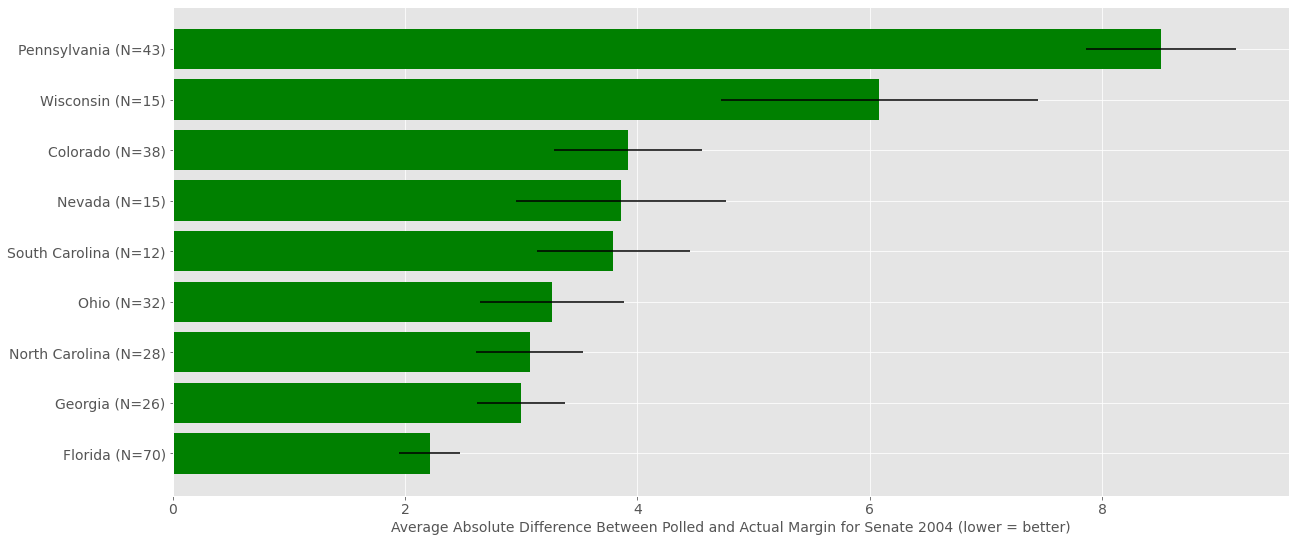

-
## Governor 2004 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina           13.692308           12.810800          0.881507   

   polled_margin_count  polled_margin_std  
0                   13           2.657838  
(1, 6)


-
## President 2002 ##
-
## Senate 2002 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Texas           -5.833333          -12.053133          6.219800   
1        Colorado           -1.705882           -5.014893          3.309010   
2  North Carolina           -5.733333           -8.660290          2.926956   

   polled_margin_count  polled_margin_std  
0                   24           4.124863  
1                   17           4.149770  
2                   15           1.334523  
(3, 6)


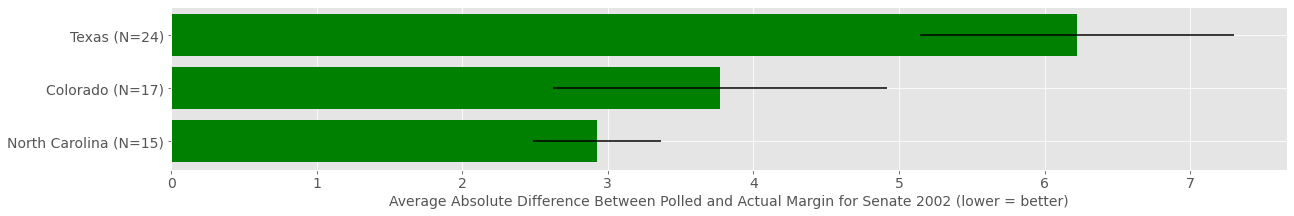

-
## Governor 2002 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  Pennsylvania           18.000000            9.121227          8.878773   
1      Michigan           11.000000            4.034291          6.965709   
2       Florida           -6.909091          -12.933577          6.024486   
3      Colorado          -34.571429          -29.490192         -5.081236   
4         Texas          -13.000000          -18.025204          5.025204   
5          Ohio          -16.116667          -19.829167          3.712500   

   polled_margin_count  polled_margin_std  
0                   12           0.852803  
1                   16           2.828427  
2                   22           3.365215  
3                   14           5.316365  
4                   22           2.507133  
5                   12           2.530122  
(6, 6)


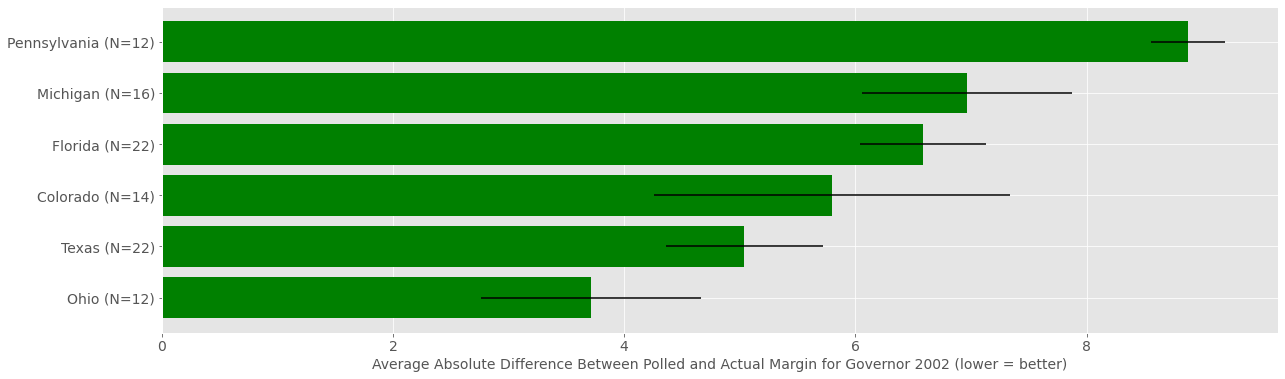

-
## President 2000 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0     Wisconsin            0.208333            0.225256         -0.016922   
1  Pennsylvania            0.950500            4.233820         -3.283320   
2      Michigan            1.840909            5.208062         -3.367153   
3       Florida            1.683333           -0.010118          1.693452   
4          Ohio           -6.850000           -3.574973         -3.275027   
5          Iowa            0.333333            0.325358          0.007976   

   polled_margin_count  polled_margin_std  
0                   24           5.875366  
1                   40           4.031486  
2                   44           3.510404  
3                   30           3.878507  
4                   24           2.442557  
5                   12           3.446562  
(6, 6)


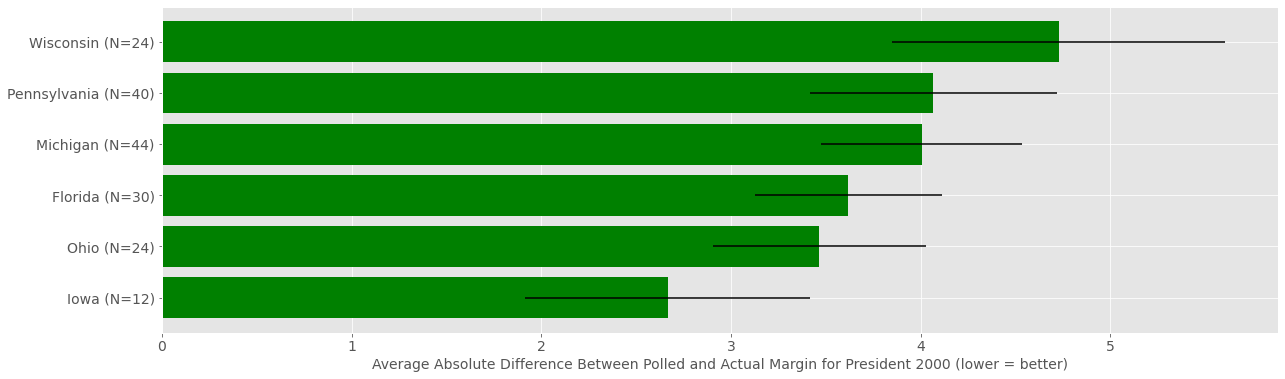

-
## Senate 2000 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  Pennsylvania          -16.964286           -6.978030         -9.986255   
1     Wisconsin           30.235294           24.666076          5.569218   
2      Michigan           -2.428571            1.632083         -4.060655   
3          Ohio          -25.075000          -24.560682         -0.514318   
4       Florida            4.666667            4.915796         -0.249130   

   polled_margin_count  polled_margin_std  
0                   28           3.214345  
1                   17           8.174116  
2                   28           6.573959  
3                   24           3.957849  
4                   21           3.610171  
(5, 6)


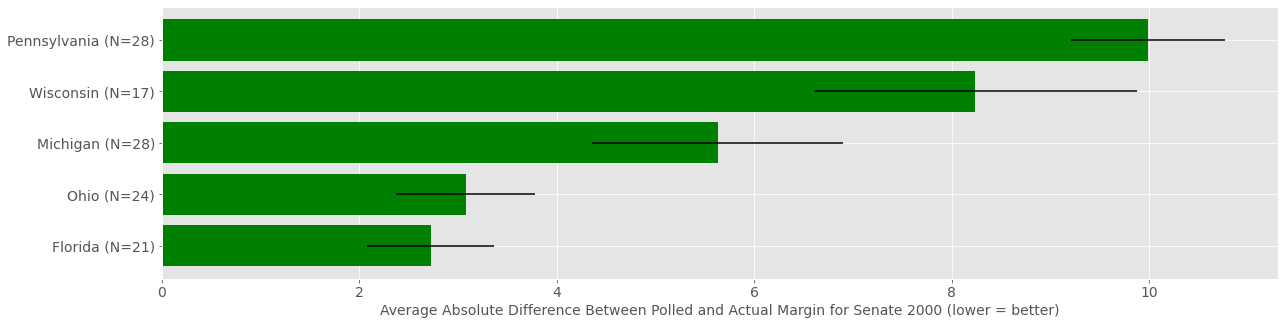

-
## Governor 2000 ##
-


In [22]:
for y in [2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls, grouper='state', election=p, year=y)
        print('-')

## 538 Grade

## President 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               A            3.887755           -1.263561          5.151317   
1               B            3.540411           -0.915682          4.456093   
2               C            3.385036           -0.798578          4.183614   
3             D/F            2.895833           -1.169520          4.065353   

   polled_margin_count  polled_margin_std  
0                   98           4.264219  
1                  146           4.036208  
2                  139           5.334245  
3                  192           7.371289  
(4, 6)


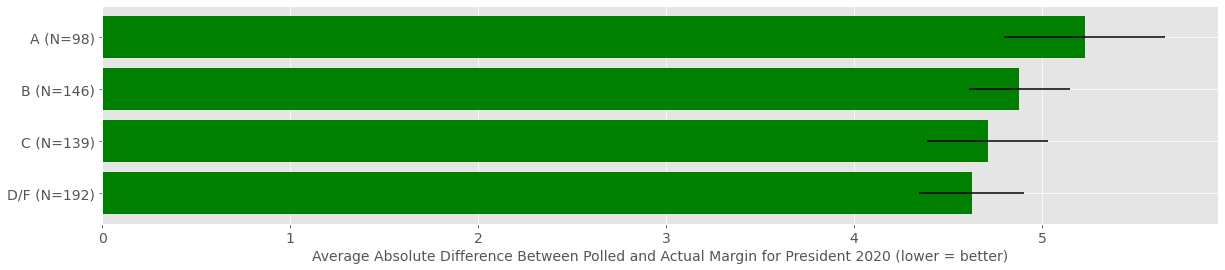

-
## Senate 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            4.254286           -2.651643          6.905929   
1               A            2.864262           -3.079742          5.944004   
2               B            2.659677           -2.420833          5.080510   
3               C            3.940909           -1.087799          5.028708   

   polled_margin_count  polled_margin_std  
0                   35           6.102089  
1                   61           4.507554  
2                   62           5.005651  
3                   66           5.097611  
(4, 6)


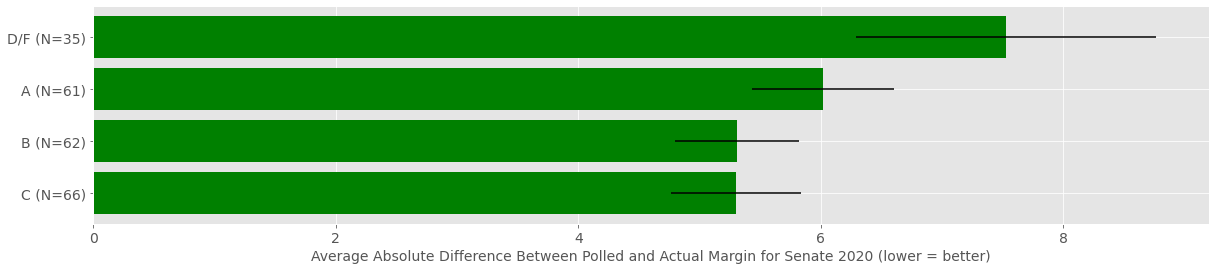

-
## Governor 2020 ##
-
## Gcb 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               B            9.500000            3.100000          6.400000   
1               C            7.003478            3.100000          3.903478   

   polled_margin_count  polled_margin_std  
0                   16           2.000000  
1                   46           1.696007  
(2, 6)


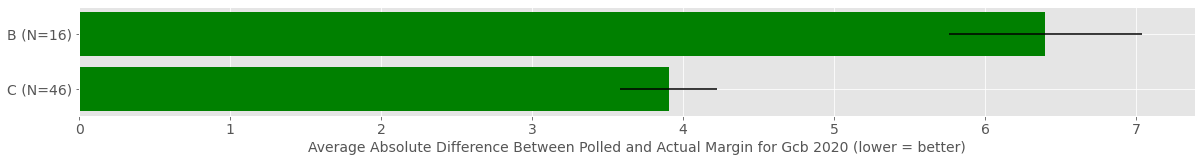

-
## President 2018 ##
-
## Senate 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.255372            2.112392         -0.857020   
1               A            2.536744            2.174037          0.362707   
2               B            5.630545            4.486278          1.144267   
3             D/F            2.258065            3.726216         -1.468151   

   polled_margin_count  polled_margin_std  
0                  121           6.799178  
1                   43           7.262358  
2                   55           6.904185  
3                   31           4.916081  
(4, 6)


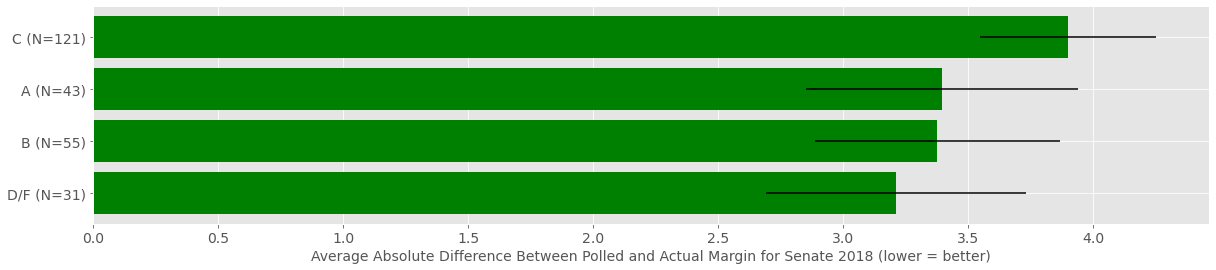

-
## Governor 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            1.976923            3.000769         -1.023846   
1               C            0.058163           -0.773061          0.831224   
2               B            0.162963            0.435556         -0.272593   
3               A            0.949000           -0.790500          1.739500   

   polled_margin_count  polled_margin_std  
0                   13           8.650545  
1                   49          10.579281  
2                   27           9.086895  
3                   20           9.332265  
(4, 6)


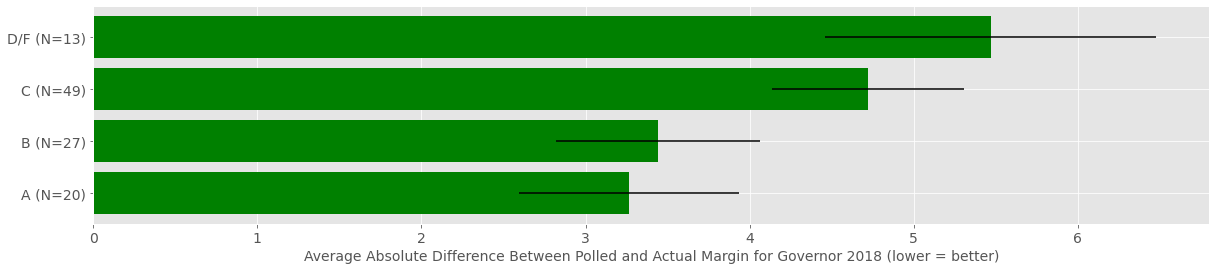

-
## Gcb 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            7.358209            8.600000         -1.241791   
1               B            7.144928            8.600000         -1.455072   
2               A            8.400000            8.600000         -0.200000   

   polled_margin_count  polled_margin_std  
0                   67           2.983294  
1                   69           2.269849  
2                   19           2.792052  
(3, 6)


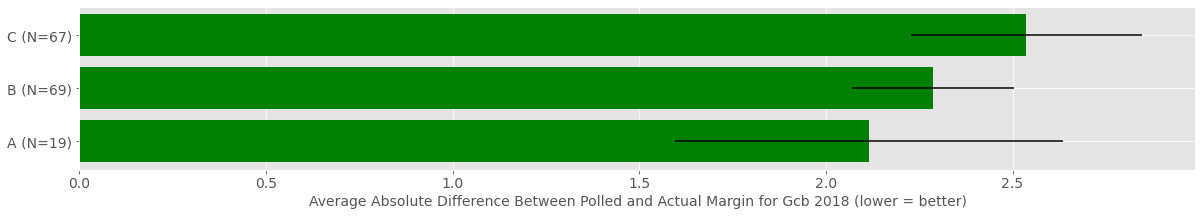

-
## President 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.537632           -1.878816          3.416447   
1             D/F            0.331447           -2.606447          2.937895   
2               B            1.101923           -2.432500          3.534423   
3               A           -0.086486           -2.832162          2.745676   

   polled_margin_count  polled_margin_std  
0                   76           4.252837  
1                   76           5.571672  
2                   52           4.315794  
3                   37           5.314141  
(4, 6)


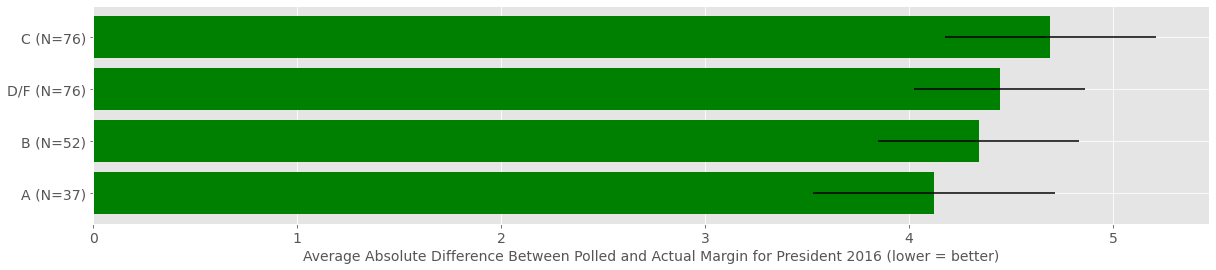

-
## Senate 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F           -5.066667           -8.827333          3.760667   
1               C           -1.243137           -4.972157          3.729020   
2               B           -3.700000           -7.699524          3.999524   
3               A           -5.370000           -6.919667          1.549667   

   polled_margin_count  polled_margin_std  
0                   30           9.365871  
1                   51           7.174239  
2                   42           6.807349  
3                   30           7.713273  
(4, 6)


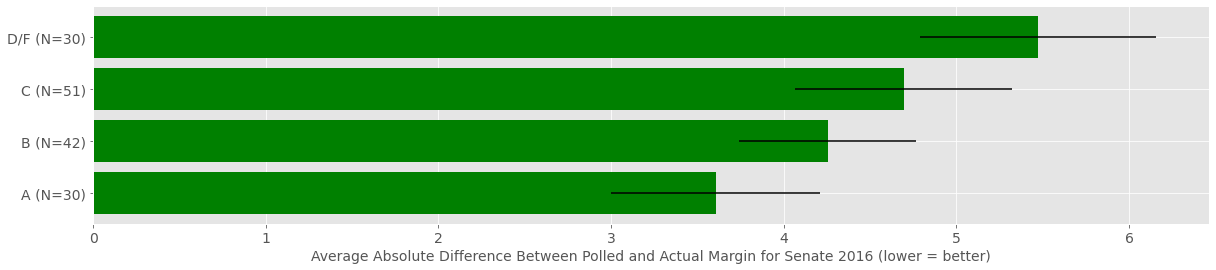

-
## Governor 2016 ##
-
## Gcb 2016 ##
-


In [23]:
for y in [2020, 2018, 2016]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'], grouper='538grade_simple', election=p, year=y)
        print('-')

## President 2020 ##
             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0             Ohio               B            2.500000           -8.031962   
1        Wisconsin               A           10.185714            0.627100   
2             Iowa               A            1.100000           -8.152965   
3             Iowa             D/F            0.333333           -8.152965   
4             Iowa               C           -0.250000           -8.152965   
5             Iowa               B           -0.275000           -8.152965   
6        Wisconsin             D/F            8.206667            0.627100   
7          Florida               A            3.416667           -3.358369   
8         Nebraska             D/F          -12.375000          -19.057532   
9         Michigan               C            8.261538            2.783528   
10       Wisconsin               B            7.200000            0.627100   
11       Wisconsin               C         

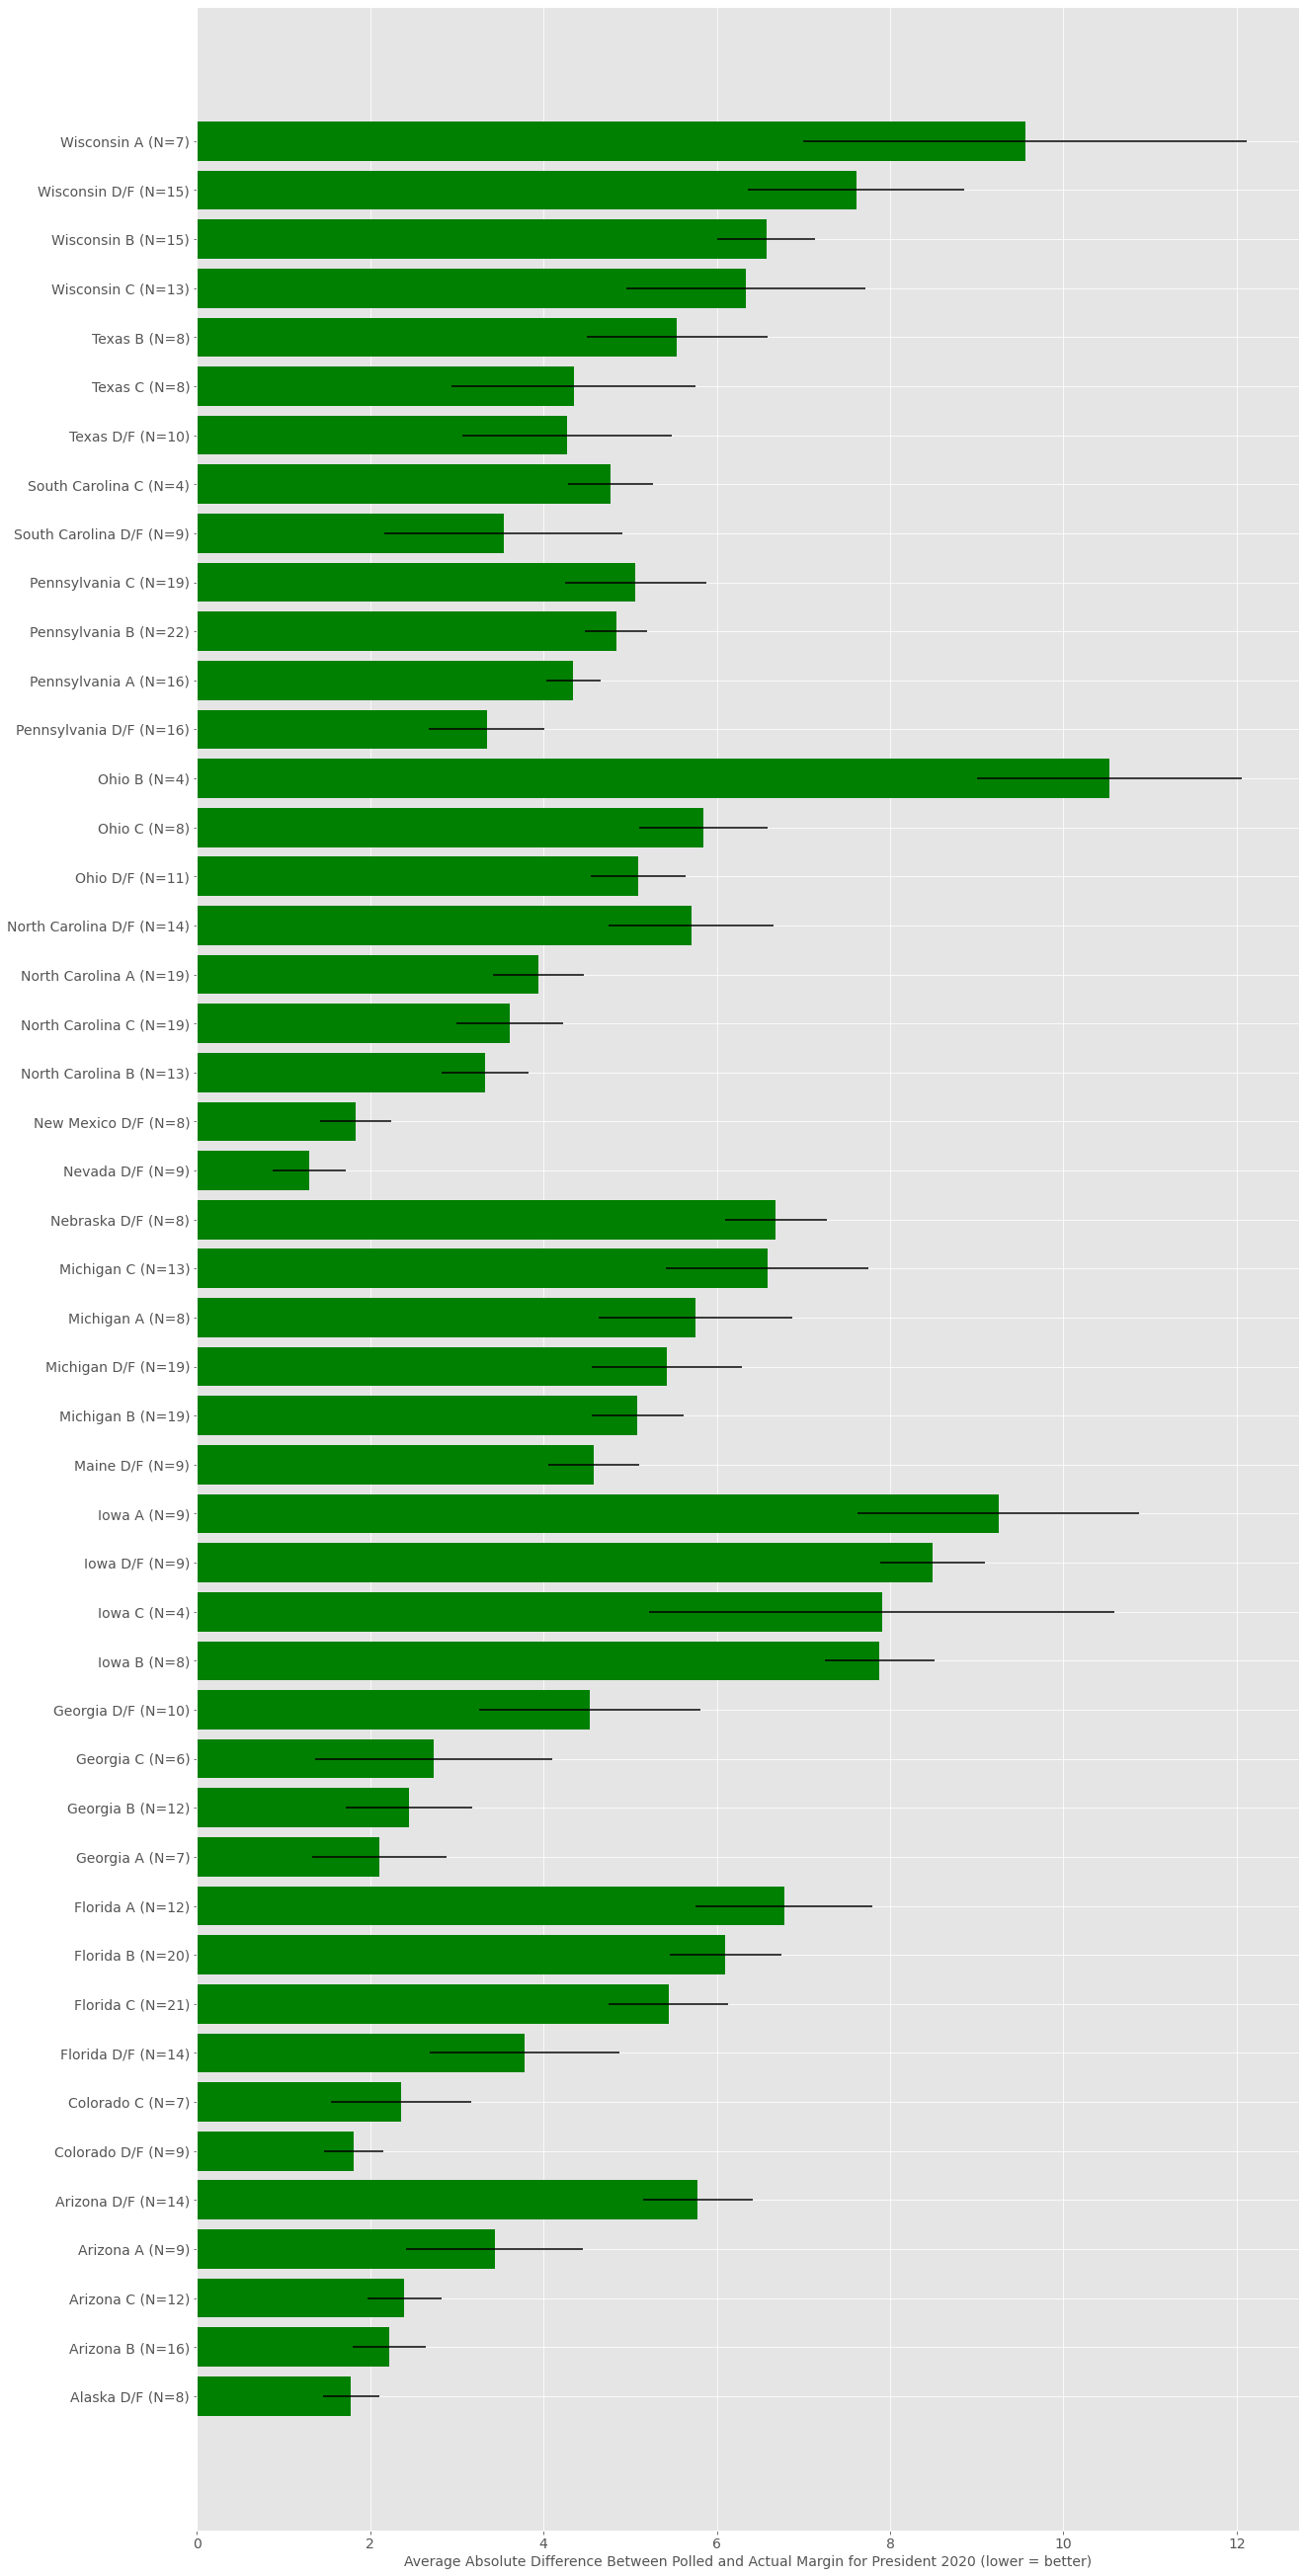

-
## Senate 2020 ##
             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0            Maine             D/F            6.000000           -8.501941   
1            Maine               A            1.560000           -8.501941   
2         Michigan               C            9.366667            1.685031   
3             Iowa               B            1.137500           -6.478210   
4             Iowa               A            1.113333           -6.478210   
5   South Carolina               C           -2.860000          -10.270311   
6   North Carolina               A            4.378571           -1.746737   
7          Arizona               B            7.662500            2.348697   
8         Michigan             D/F            5.711111            1.685031   
9   North Carolina               C            3.820000           -1.746737   
10         Arizona             D/F            7.700000            2.348697   
11        Michigan               B          

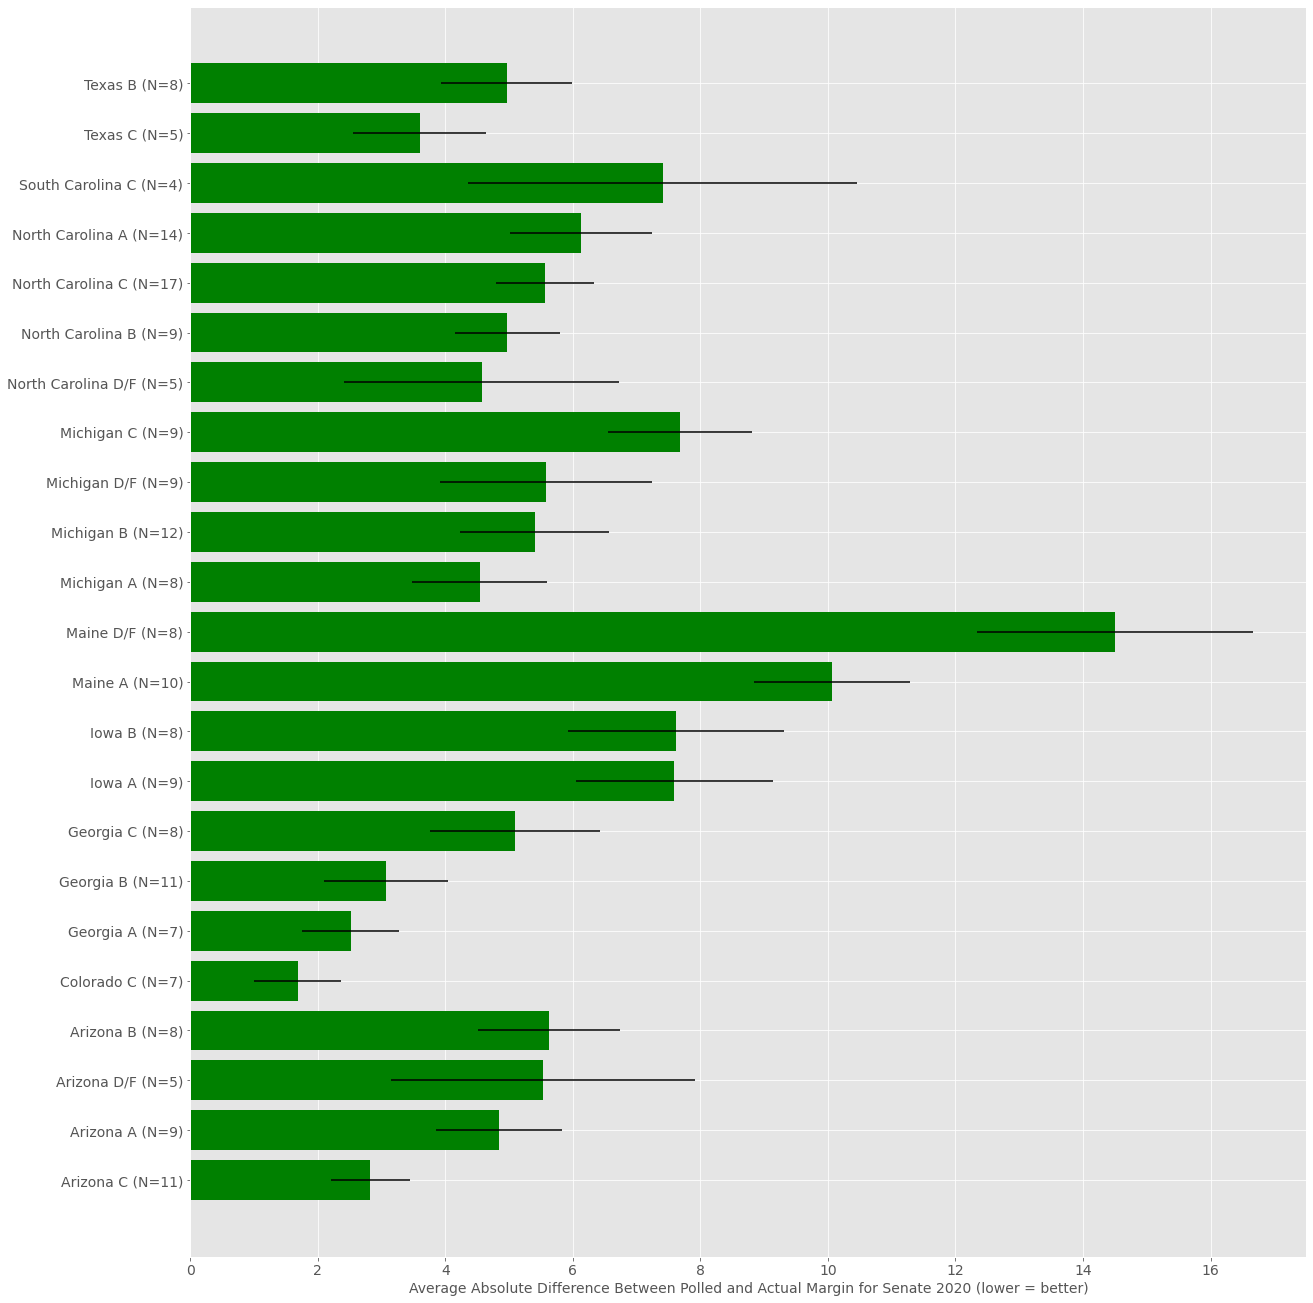

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
        state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0        Ohio               C           14.250000            6.842886   
1      Nevada               B           -1.850000            5.028496   
2    Michigan               C           12.540000            6.502801   
3        Ohio               B           12.200000            6.842886   
4     Florida               A            5.116667           -0.121460   
5     Arizona               C           -1.596000            2.346477   
6       Texas             D/F           -4.450000           -2.563623   
7      Nevada               A            0.582000            5.027594   
8      Nevada               C            1.372222            5.027828   
9    Michigan               B           10.000000            6.502801   
10      Texas               C           -5.863636           -2.565270   
11    Florida               B            3.114286          

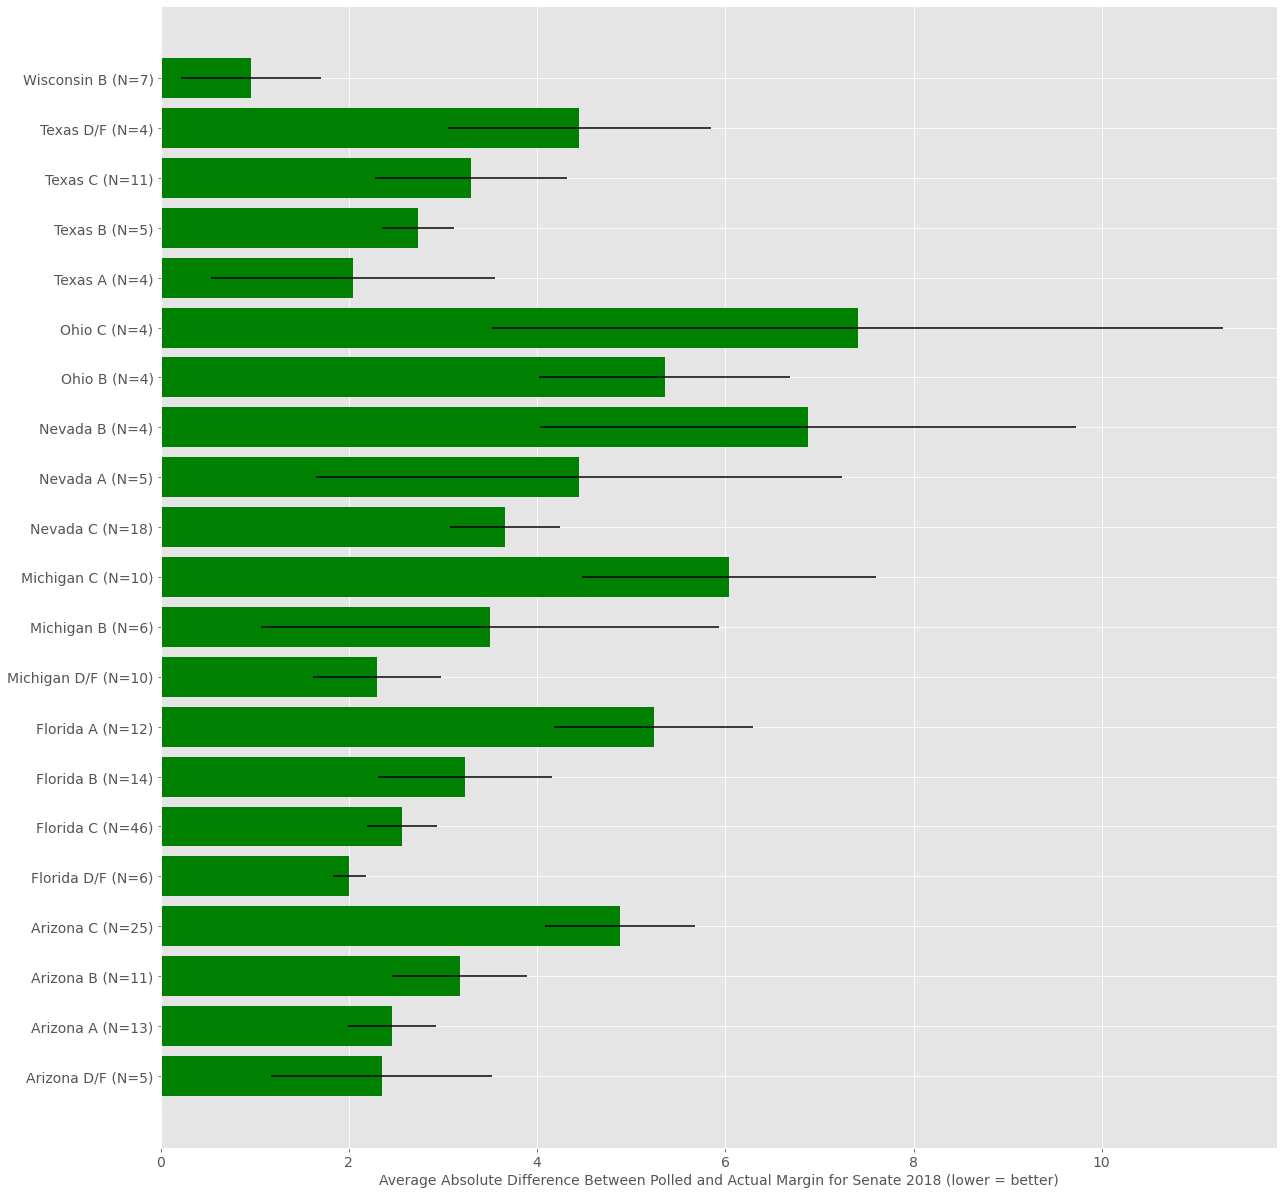

-
## Governor 2018 ##
      state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   Florida               A            4.336000           -0.400000   
1   Arizona               C          -15.237500          -14.160000   
2   Florida               B            3.771429           -0.400000   
3   Florida               C            2.916667           -0.400000   
4    Nevada               C            0.380000            4.080000   
5  Michigan               C           10.250000            9.560000   
6  Michigan             D/F            8.700000            9.560000   

   margin_diff_mean  polled_margin_count  polled_margin_std  
0          4.736000                    5           2.194876  
1         -1.077500                    8           5.633303  
2          4.171429                    7           3.156852  
3          3.316667                   18           4.240456  
4         -3.700000                    5           2.252110  
5          0.690000                  

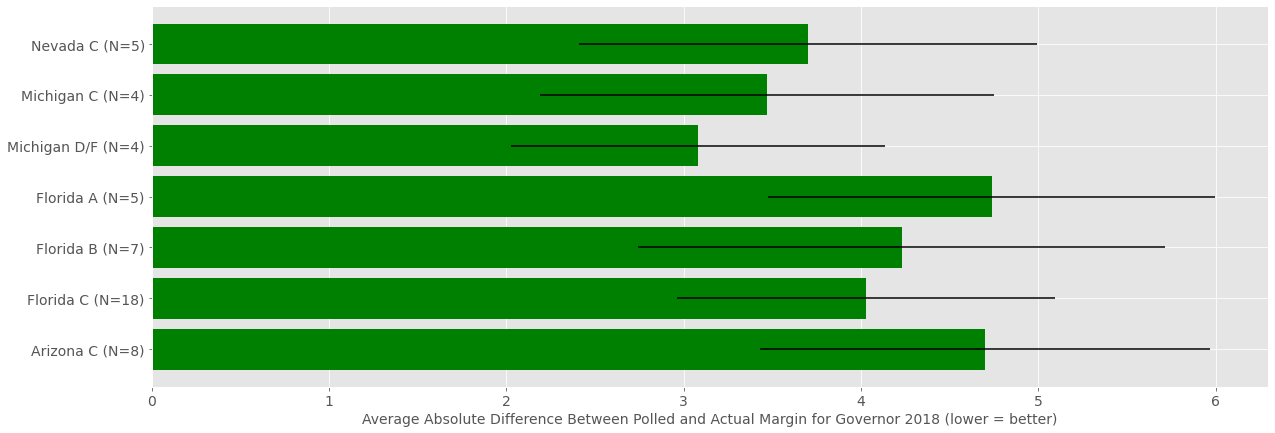

-


In [24]:
for y in [2020, 2018]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'],
                   grouper=['state', '538grade_simple'], election=p, year=y, count_filter=3)
        print('-')

## Methodology

       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online/Text            3.418182           -1.460370          4.878552   
1      Online/Live            1.116822           -0.002617          1.119439   
2       IVR/Online           -1.284629           -0.931028         -0.353600   
3              IVR            0.107386            3.447395         -3.340009   
4           Online            1.895835            0.220499          1.675336   
5       Live Phone            0.485555           -0.114487          0.600042   
6         IVR/Live            1.986129            0.442688          1.543441   
7  IVR/Online/Live           -0.843713           -1.524926          0.681213   
8  IVR/Online/Text            0.631923           -1.540617          2.172541   
9         IVR/Text            1.794156            0.501695          1.292461   

   polled_margin_count  polled_margin_std  
0                   55           4.677333  
1                  107         

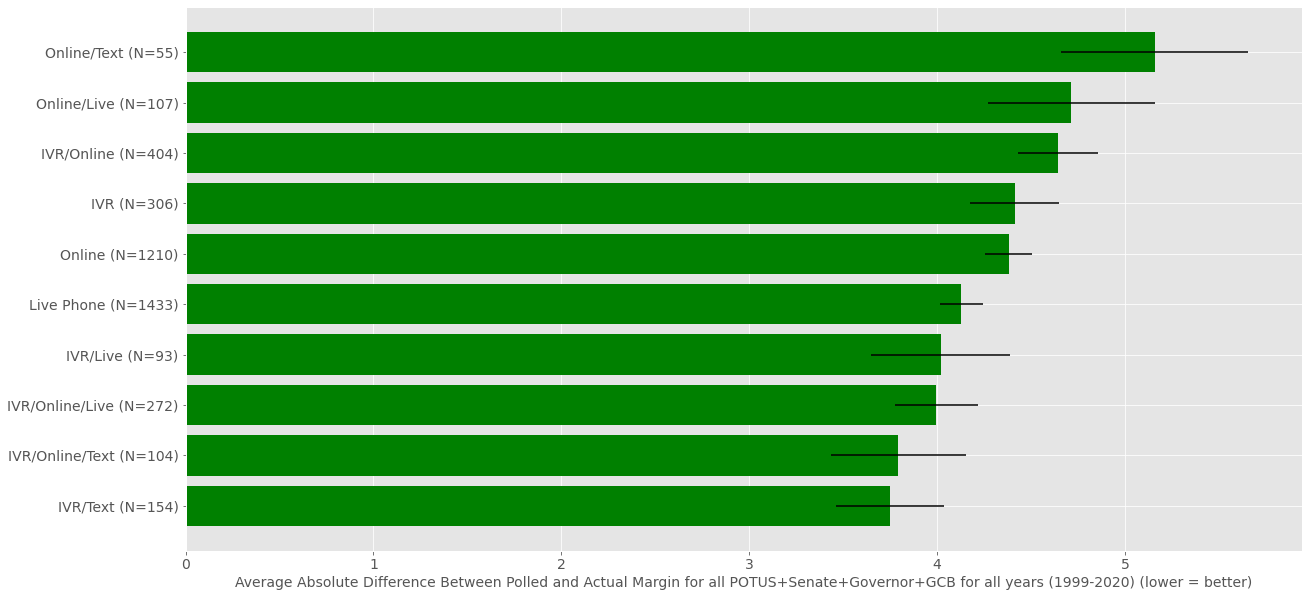

In [25]:
plot_polls(polls[polls['methodology'] != 'Unknown'], grouper='methodology', election=None, year=None, count_filter=50)

       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  IVR/Online/Live            1.187500           -0.255625          1.443125   
1       IVR/Online            0.114894            2.121691         -2.006798   
2         IVR/Live            1.983333            3.882500         -1.899167   
3      Online/Live            4.391667            4.588333         -0.196667   
4              IVR            0.646341            2.134331         -1.487990   
5       Live Phone            3.689291            2.677631          1.011660   
6           Online            4.990625            5.921120         -0.930495   
7  IVR/Online/Text            2.422222            1.668333          0.753889   

   polled_margin_count  polled_margin_std  
0                   16           8.035079  
1                   47           7.002080  
2                   12          10.607187  
3                   12          11.409602  
4                   41           5.628015  
5              

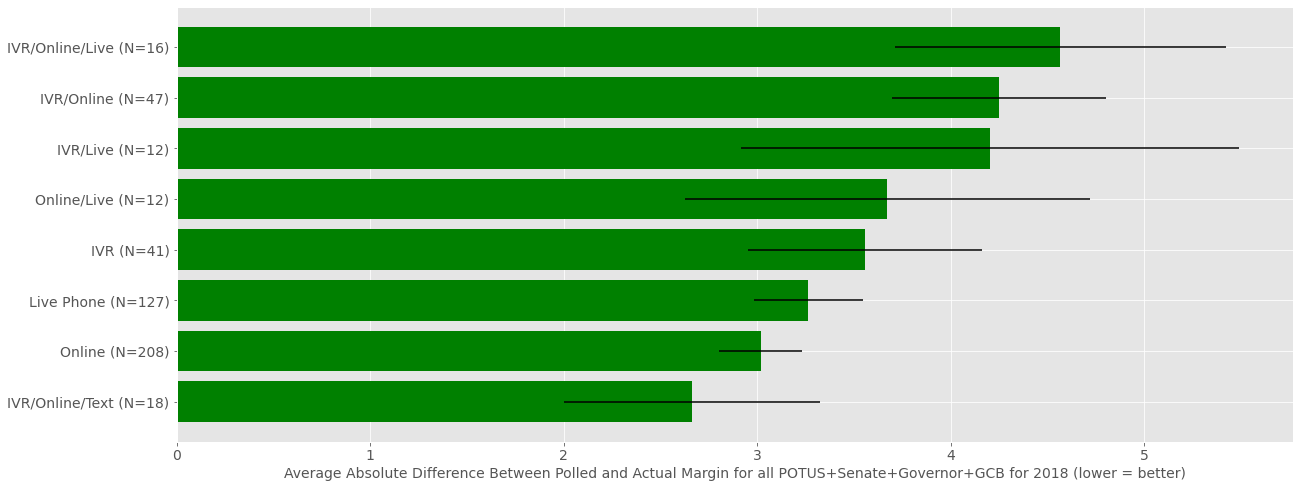

In [26]:
plot_polls(polls[polls['methodology'] != 'Unknown'], grouper='methodology', election=None, year=2018)

       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       IVR/Online           -2.039286            0.151845         -2.191131   
1              IVR            0.186033            4.096464         -3.910431   
2       Live Phone            1.282500            1.740048         -0.457548   
3  IVR/Online/Live           -0.858586            0.358283         -1.216869   
4         IVR/Text            1.260833            1.004417          0.256417   
5           Online            0.269118            0.900756         -0.631638   

   polled_margin_count  polled_margin_std  
0                  168           7.540835  
1                  242           5.842228  
2                  548           8.312687  
3                   99           8.827150  
4                  120           6.896306  
5                  272          10.057286  
(6, 6)


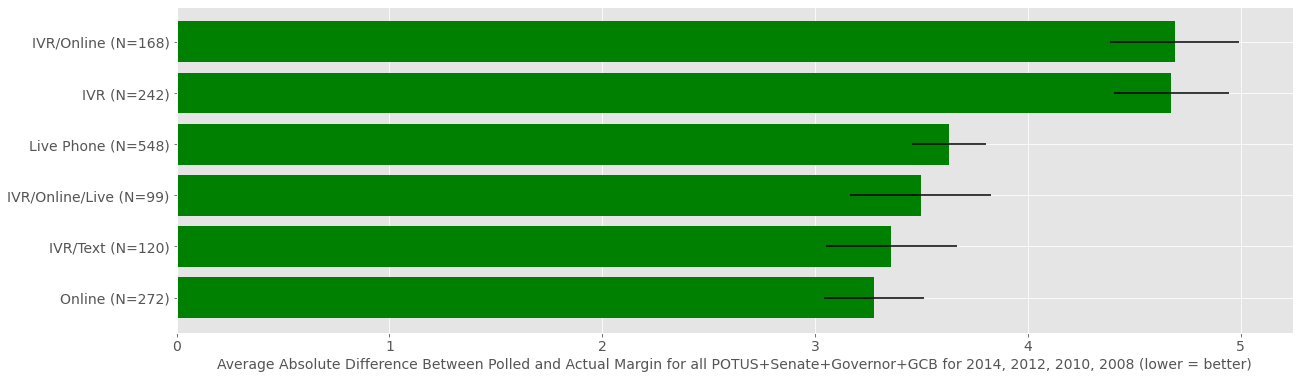

In [27]:
plot_polls(polls[polls['methodology'] != 'Unknown'], grouper='methodology', election=None, year=[2014, 2012, 2010, 2008], count_filter=50)

       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       IVR/Online            2.293462           -4.315579          6.609041   
1           Online            4.278082           -1.802749          6.080831   
2      Online/Text            4.100000           -2.055014          6.155014   
3       Live Phone            3.800000           -1.634435          5.434435   
4  IVR/Online/Text            2.101111           -2.317849          4.418960   

   polled_margin_count  polled_margin_std  
0                   26           4.324417  
1                   73           5.568569  
2                   20           4.228973  
3                   65           4.788365  
4                   18           3.971608  
(5, 6)


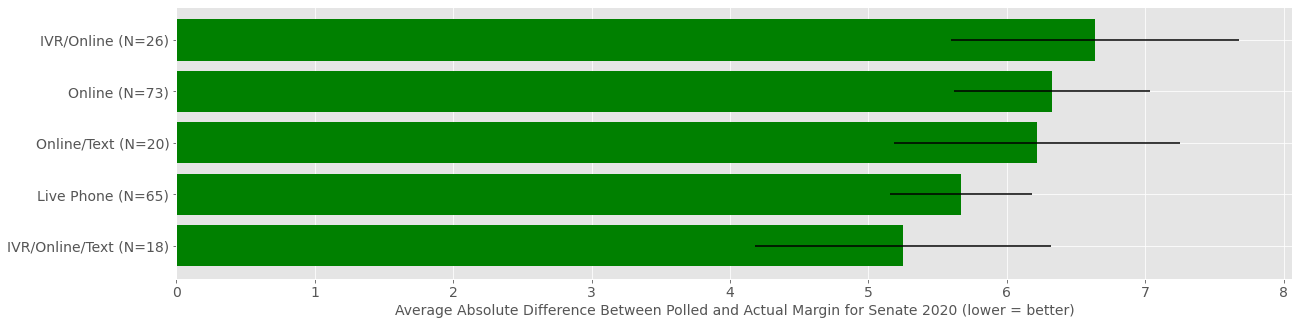

In [28]:
plot_polls(polls[polls['methodology'] != 'Unknown'], grouper='methodology', election=['senate'], year=[2020])


## Pollster

                                    pollster  polled_margin_mean  \
0                      Quinnipiac University            2.710526   
1                                       SSRS            6.750000   
2         Mitchell Research & Communications            7.229167   
3               Redfield & Wilton Strategies            6.611111   
4                        Monmouth University            3.903226   
5                                   Swayable            4.120000   
6                                     Civiqs            5.214286   
7    Siena College/The New York Times Upshot            3.210526   
8                      Public Policy Polling            4.166667   
9                            Morning Consult            4.159091   
10              ABC News/The Washington Post            4.714286   
11                           Change Research            5.000000   
12                                     Ipsos            4.771930   
13                              SurveyMonkey    

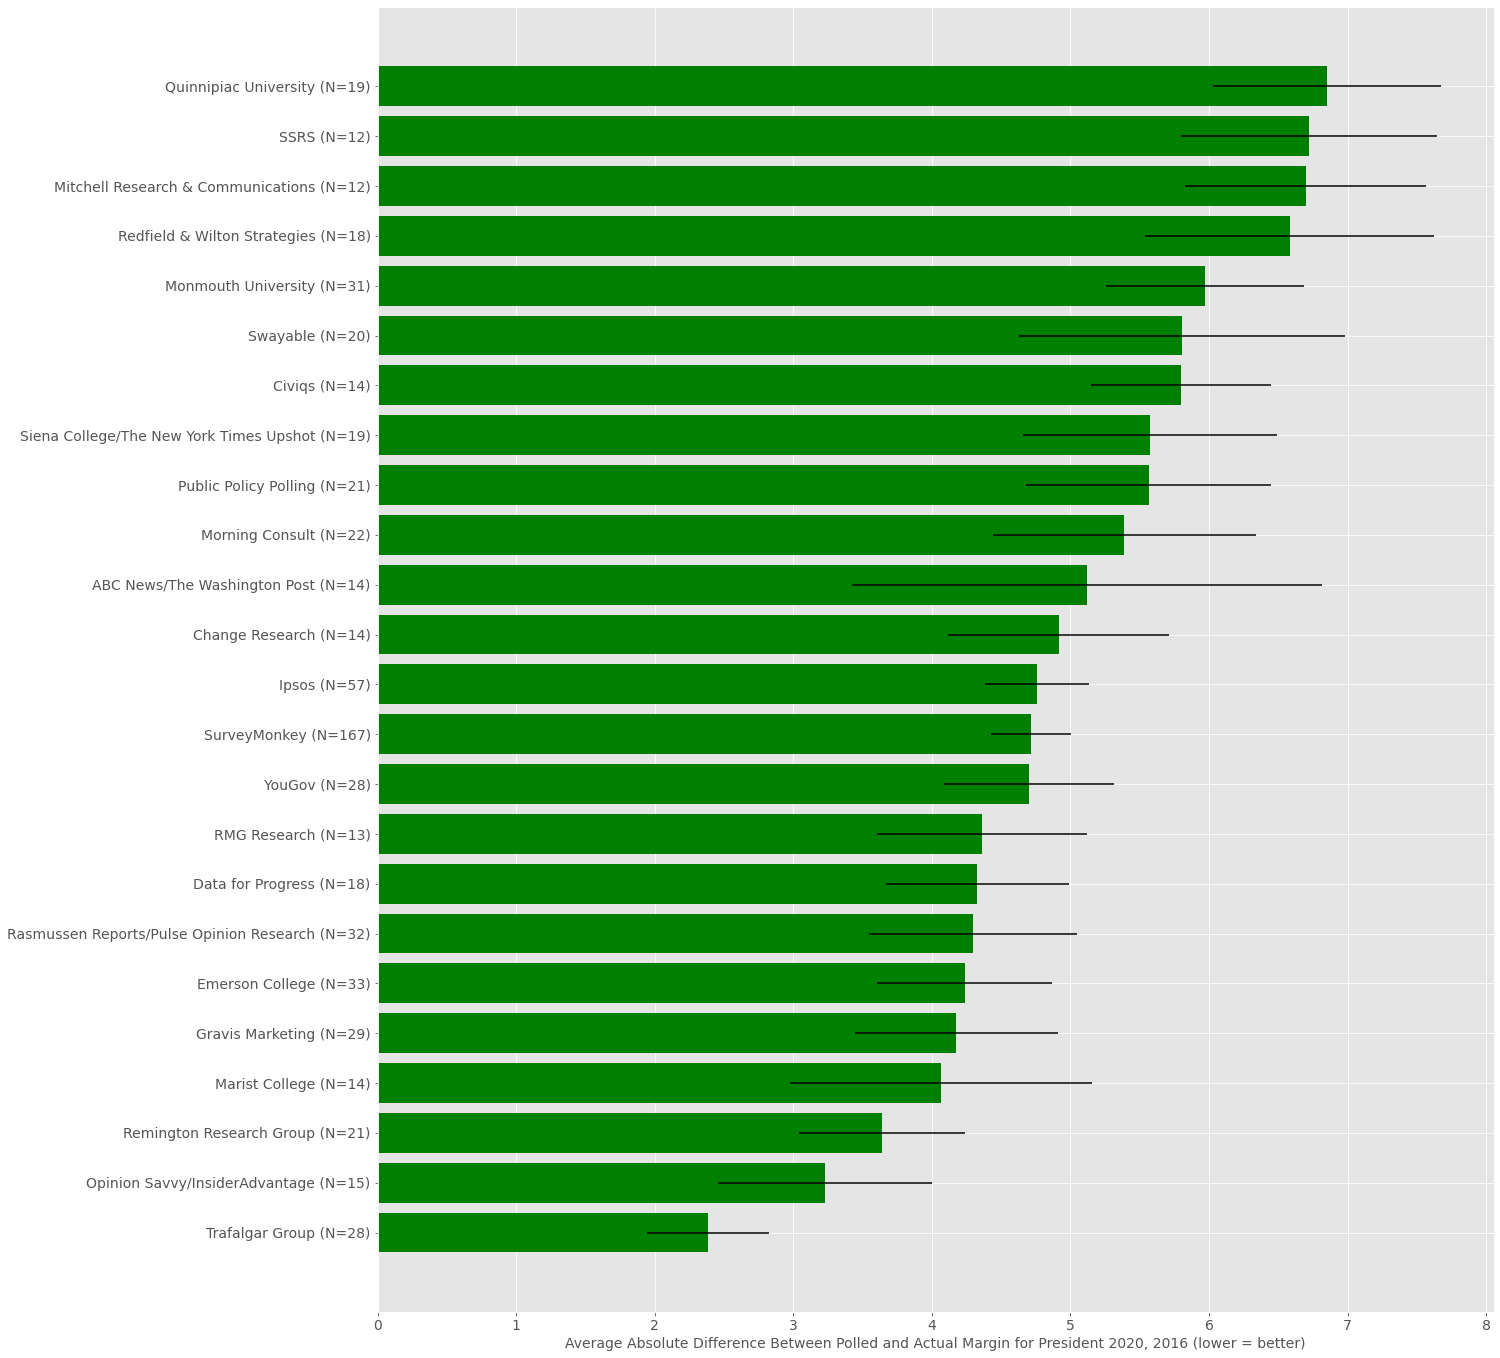

In [29]:
plot_polls(polls, grouper='pollster', election='president', year=[2020, 2016])

                                    pollster  polled_margin_mean  \
0                      Quinnipiac University            2.710526   
1                                       SSRS            6.750000   
2         Mitchell Research & Communications            7.229167   
3               Redfield & Wilton Strategies            6.611111   
4                        Monmouth University            3.903226   
5                                   Swayable            4.120000   
6                                     Civiqs            5.214286   
7    Siena College/The New York Times Upshot            3.210526   
8                      Public Policy Polling            4.166667   
9                            Morning Consult            4.159091   
10              ABC News/The Washington Post            4.714286   
11                           Change Research            5.000000   
12                                     Ipsos            4.771930   
13                              SurveyMonkey    

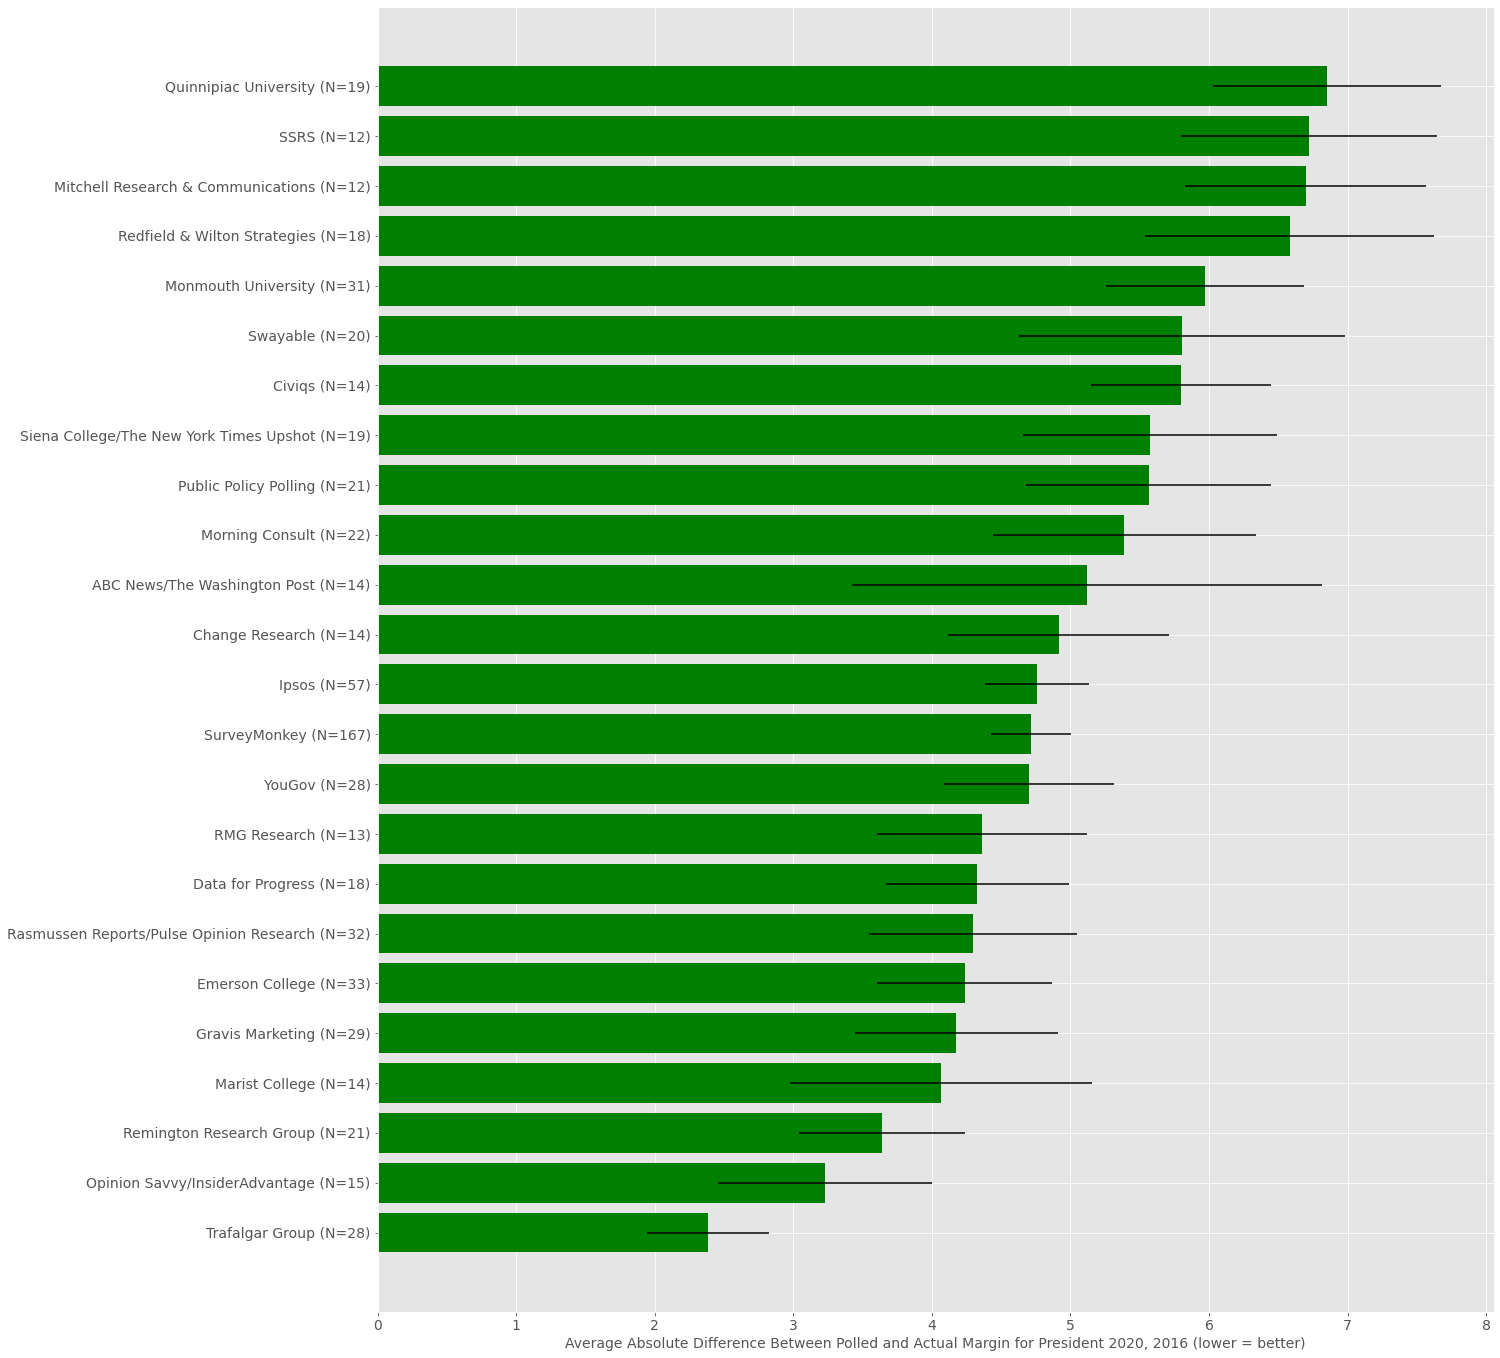

In [33]:
plot_polls(polls, grouper='pollster', election='president', year=[2020, 2016])

                                    pollster  polled_margin_mean  \
0                          Zogby (Internet)             1.384615   
1                               TCJ Research           -2.227273   
2             Zogby Interactive/JZ Analytics            2.218750   
3                                        ARG           -0.882353   
4                    American Research Group            0.818182   
5                         InAdv/PollPosition            2.666667   
6       Mason-Dixon Polling & Research, Inc.            1.133333   
7                           InsiderAdvantage            2.333333   
8   Rasmussen Reports/Pulse Opinion Research            0.610169   
9             Mason-Dixon Polling & Strategy            1.133333   
10            Opinion Savvy/InsiderAdvantage            2.333333   
11                                 Rasmussen            1.181818   
12                         InsiderAdvantage             3.076923   
13                              Mason-Dixon     

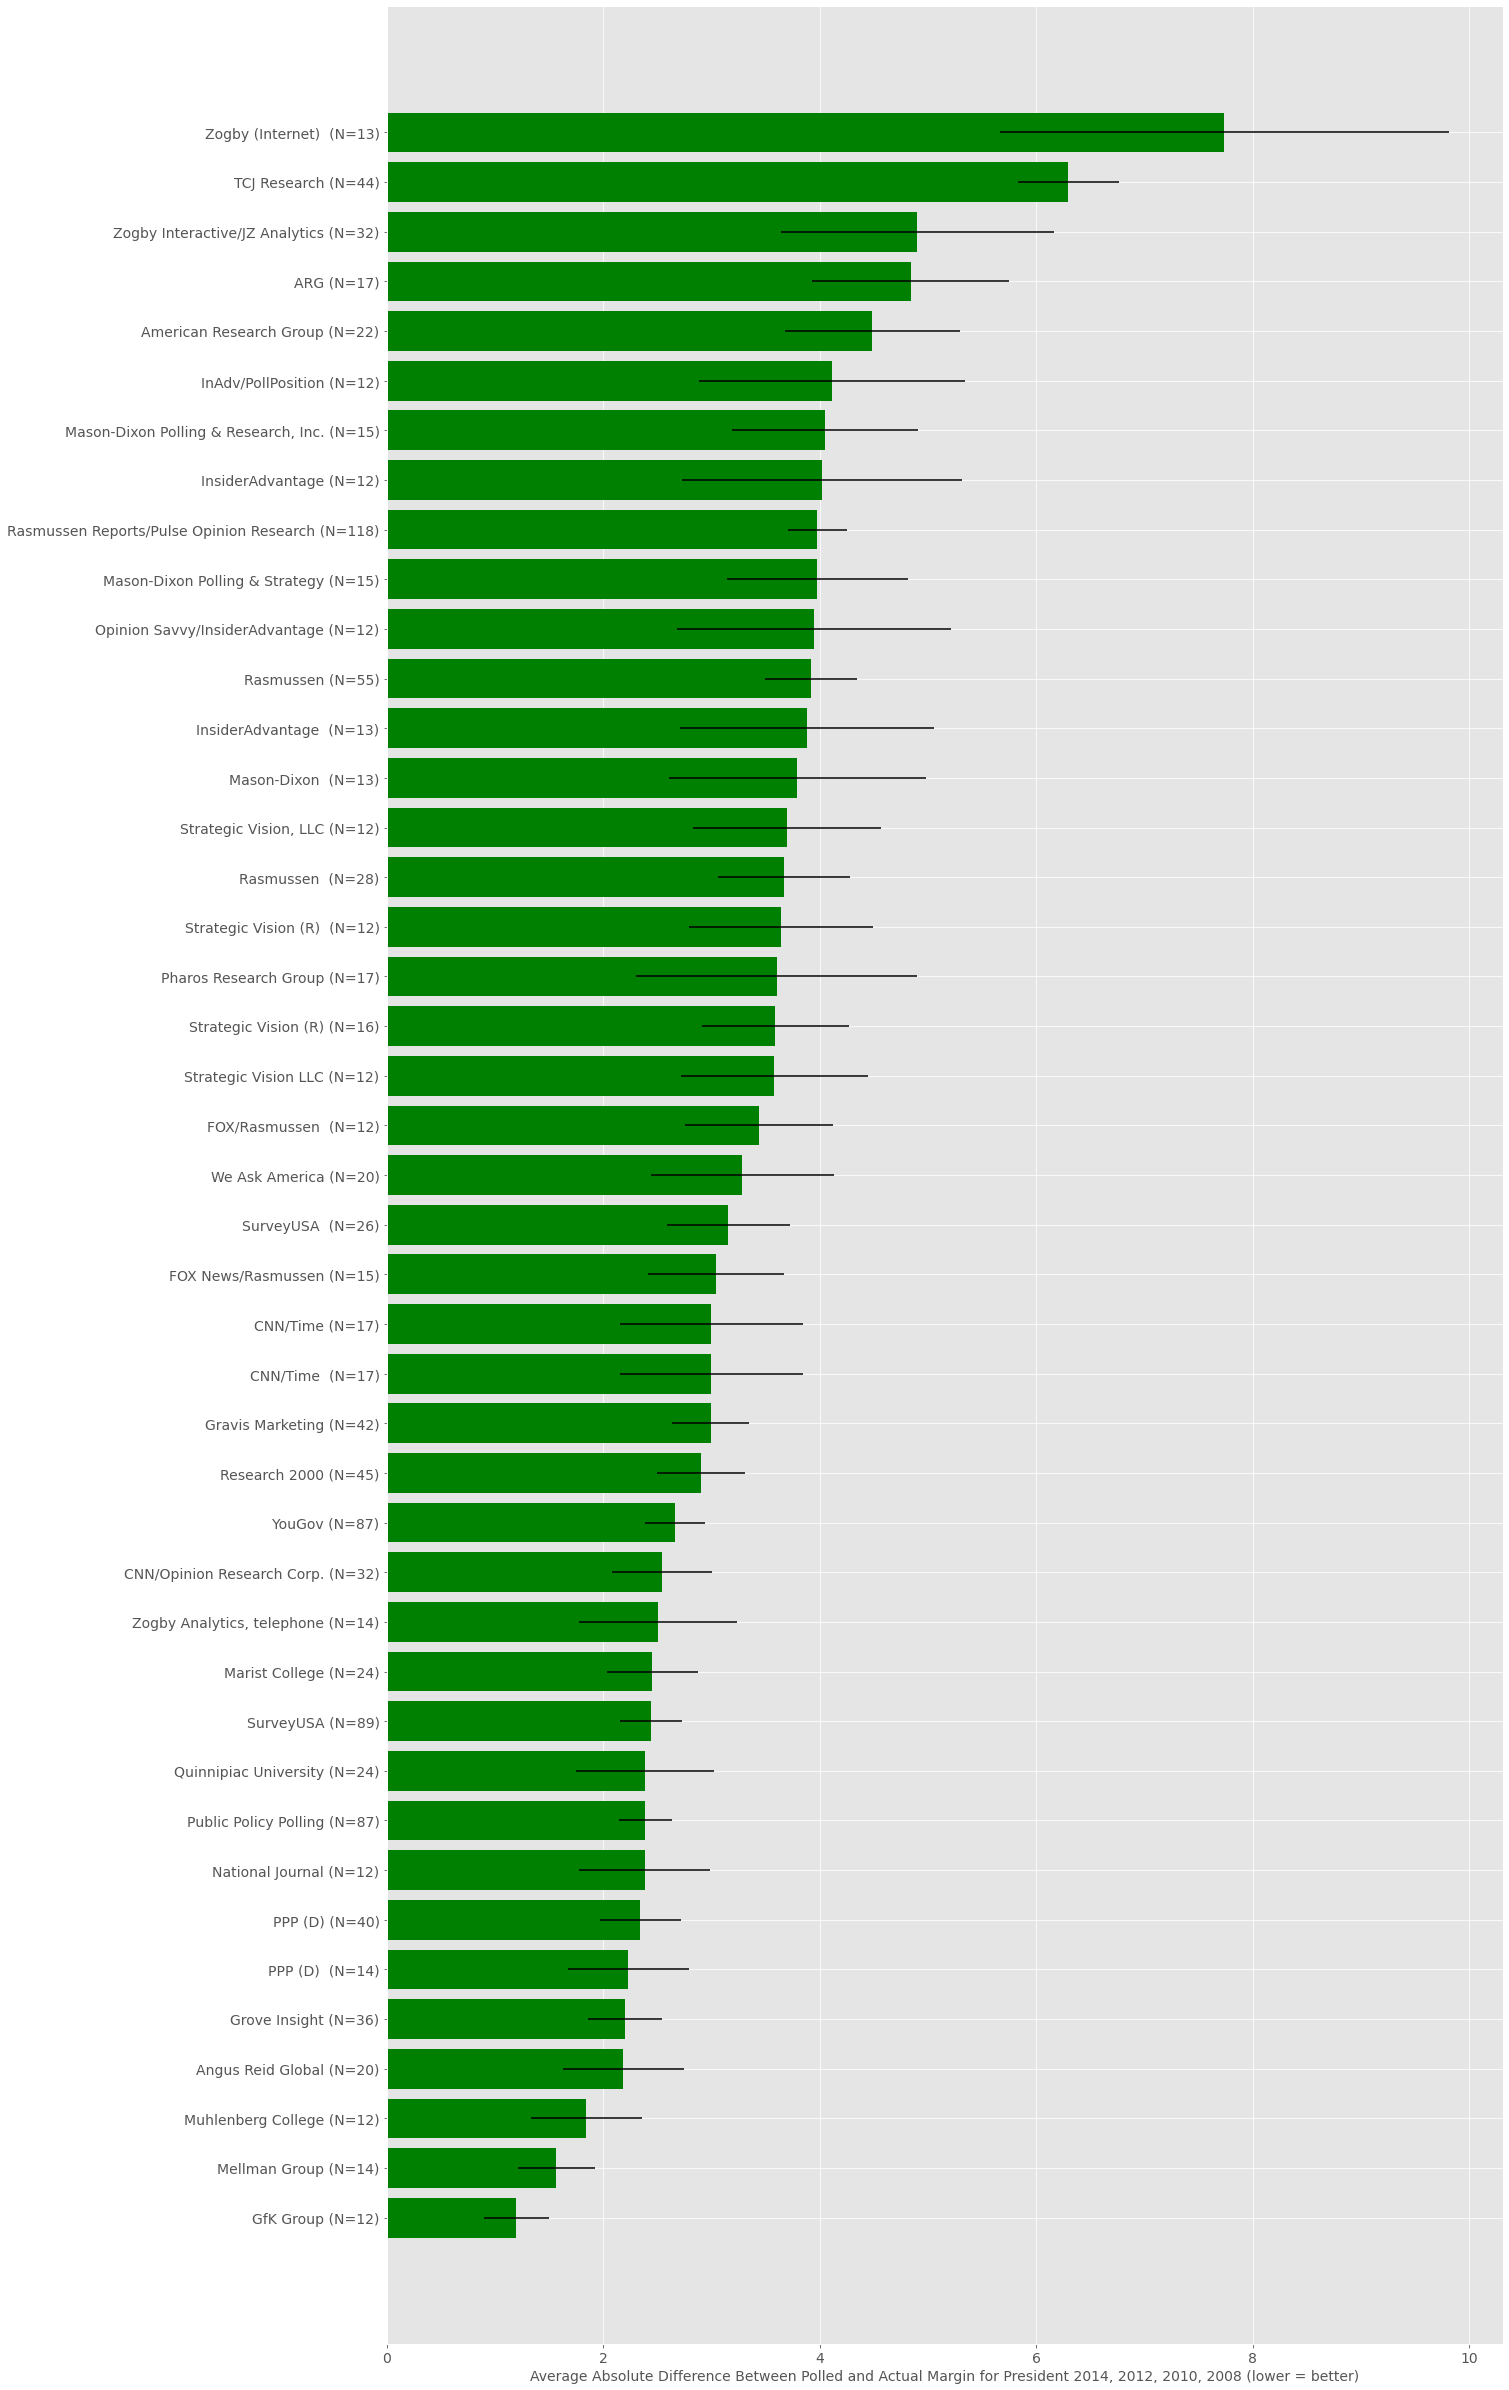

In [31]:
plot_polls(polls, grouper='pollster', election='president', year=[2014, 2012, 2010, 2008])

                                    pollster  polled_margin_mean  \
0                              Research 2000            2.161290   
1                      Pharos Research Group            5.262353   
2                               TCJ Research           -4.700000   
3                          Rasmussen Reports           -4.545455   
4   Rasmussen Reports/Pulse Opinion Research           -2.558140   
5                                  Rasmussen            2.285714   
6                                 SurveyUSA             1.461538   
7                           Gravis Marketing           -2.785714   
8                                  SurveyUSA           -0.290323   
9                                 Rasmussen             4.071429   
10                                    YouGov           -1.586905   
11                     Public Policy Polling            1.939024   
12                CNN/Opinion Research Corp.           -1.166667   
13                                   PPP (D)    

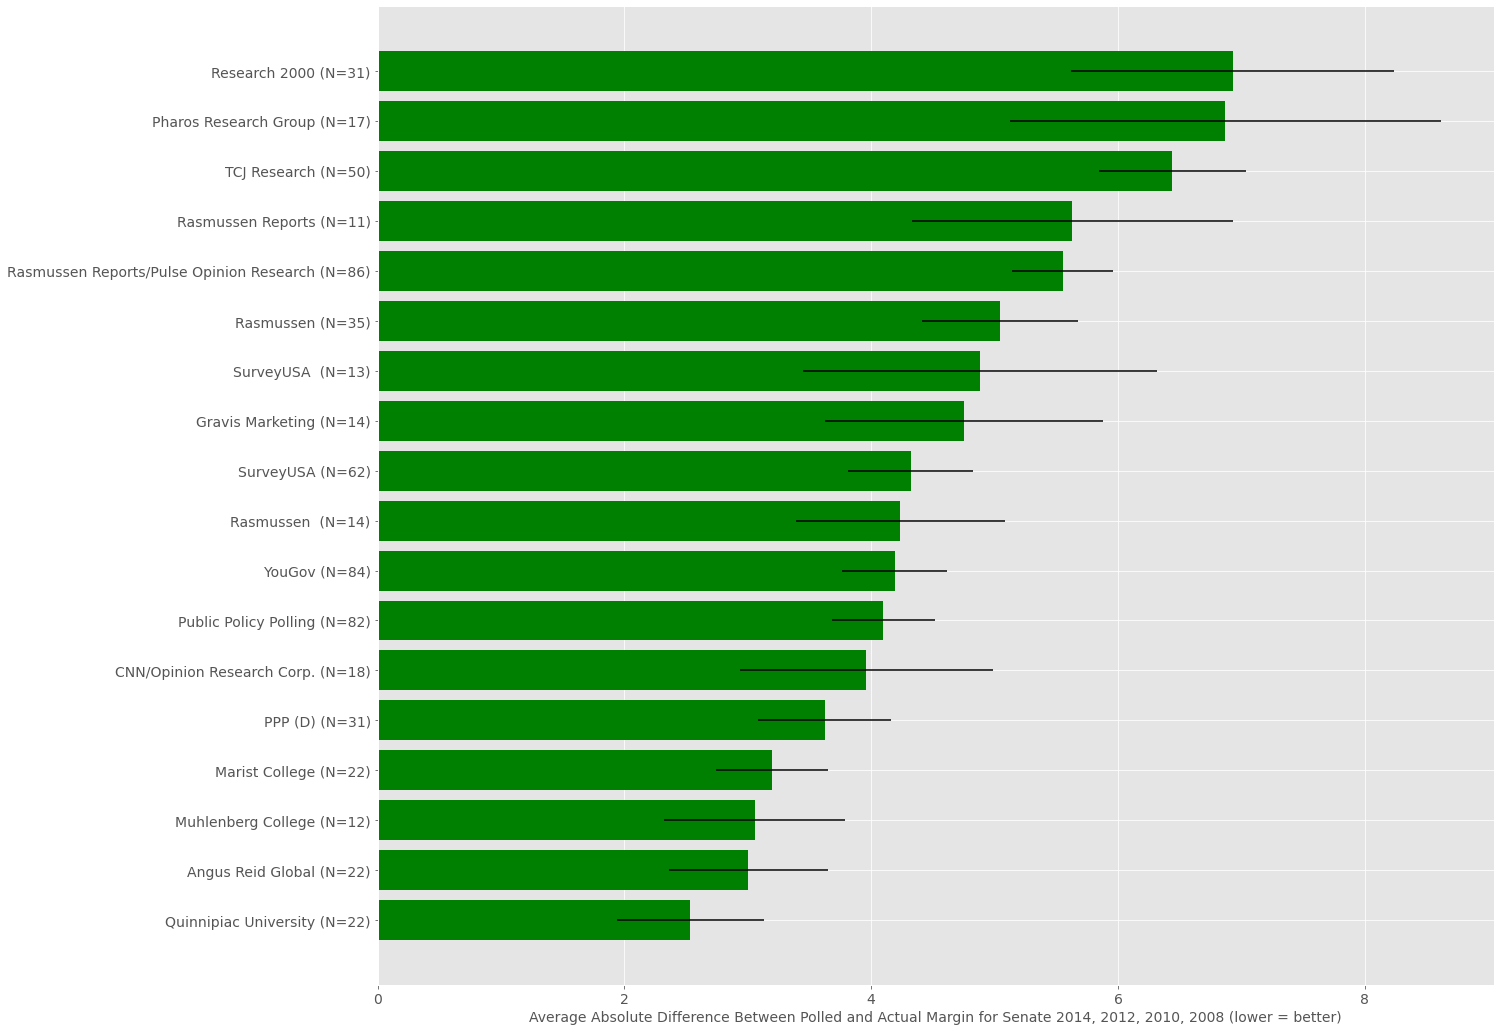

In [32]:
plot_polls(polls, grouper='pollster', election='senate', year=[2014, 2012, 2010, 2008])